In [3]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
import matplotlib.pyplot as plt
from nltk.stem.snowball import RussianStemmer
from sklearn.model_selection import train_test_split
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import f1_score
import torch
from gensim.models import Word2Vec
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer
import nltk
from tqdm import tqdm
from transformers import GPT2LMHeadModel, GPT2Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')

-----------------------------

In [ ]:
# pip install numpy==1.23.5
# pip install gensim==4.3.1
# pip install scipy==1.10.1

In [1]:
# pip install pymorphy2

----------------------------

Кущенко Валерия, id25

In [4]:
df = pd.read_csv('/content/train.csv', encoding='utf-8')

In [5]:
df.head()

,id,text,labels
0,0,15 января\nДетская развлекательная программа\n...,1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
1,1,13 и 14 августа\nВыходные в Меге\nhttps://t.me...,0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
2,2,Йокнапатофа\nПостановка Театр им. Маяковского\...,0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
3,3,Впервые в Уфе танцевальная терапия в группе с ...,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
4,4,"🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня...",1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0


In [6]:
print(df['labels'].value_counts())

labels
1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0    1053
1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0     742
0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0     727
1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0     510
0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0     477
                                           ... 
1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0       1
0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0       1
1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1       1
1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1       1
1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1       1
Name: count, Length: 3540, dtype: int64


In [7]:
df.shape

(29568, 3)

In [8]:
# сделаем массив меток, а не строчку
df['labels'] = df['labels'].apply(lambda x: np.array(list(map(int, x.split()))))
y = np.stack(df['labels'].values)

In [9]:
df

,id,text,labels
0,0,15 января\nДетская развлекательная программа\n...,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
1,1,13 и 14 августа\nВыходные в Меге\nhttps://t.me...,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
2,2,Йокнапатофа\nПостановка Театр им. Маяковского\...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
3,3,Впервые в Уфе танцевальная терапия в группе с ...,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,4,"🎹\nGRAND PIANO COMPETITION\n🎹\nДрузья, сегодня...","[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."
...,...,...,...
29563,29563,Выступление Симфо-группы TEODOR\n⠀\n22 июля в ...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, ..."
29564,29564,"🔤\nЮЗИКЛ ""МОНТЕ-КРИСТО"" ТЕАТР ОПЕРЕТТЫ\nЭто оч...","[1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, ..."
29565,29565,РАСПИСАНИЕ БЕСПЛАТНЫХ ЭКСКУРСИЙ\nв октябре 202...,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ..."
29566,29566,Долгожданный концерт Надежды Кадышевой в Рязан...,"[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, ..."


посмотрим, есть ли дубликаты. и удалим их

In [10]:
duplicates = df['text'].duplicated()
df[duplicates]

,id,text,labels
68,68,#афиша #афиша_москвы #мероприятия #выставки #ф...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
204,204,#афиша #афиша_москвы #мероприятия #выставки #ф...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
280,280,#афиша #афиша_москвы #мероприятия #выставки #ф...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
334,334,#афиша #афиша_москвы #мероприятия #выставки #ф...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
383,383,#афиша #афиша_москвы #мероприятия #выставки #ф...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...
29529,29529,#афиша #афиша_москвы #мероприятия #выставки #ф...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ..."
29534,29534,Смешной и остроумный спектакль «Свадебный Сезо...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ..."
29542,29542,Концерт группы «Аттракцион Воронова»\nКогда: 9...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, ..."
29551,29551,-25% на концерт «Диско на крыше с симфонически...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ..."


In [11]:
df = df.drop_duplicates(subset=['text'])

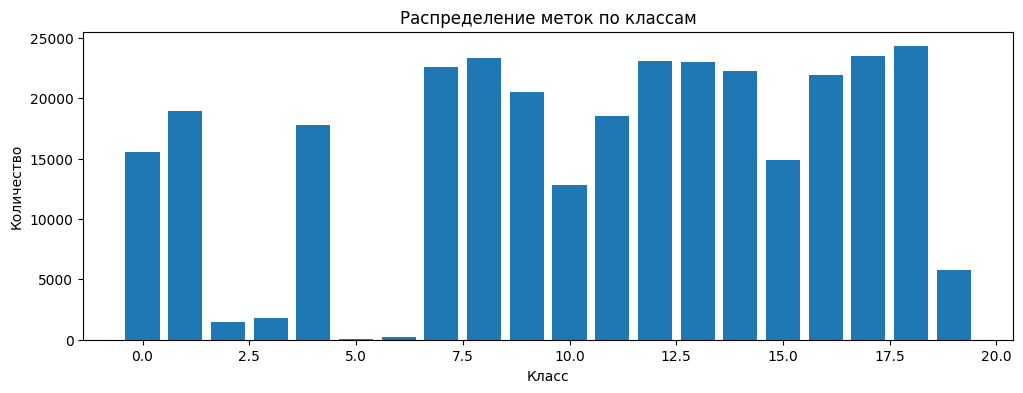

In [12]:
class_counts = y.sum(axis=0)
plt.figure(figsize=(12, 4))
plt.bar(range(len(class_counts)), class_counts)
plt.title("Распределение меток по классам")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.show()

у нас несбалансированные классы. попробуем использовать взвешивание классов в функции потерь.

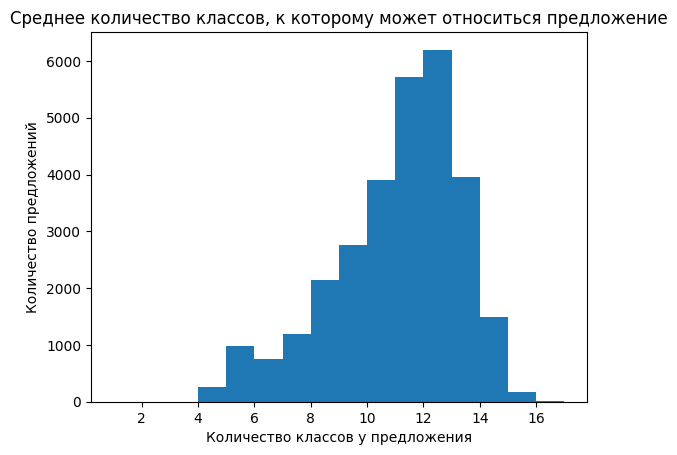

Среднее число меток: 10.57


In [13]:
labels_per_sample = y.sum(axis=1)
plt.hist(labels_per_sample, bins=range(1, labels_per_sample.max() + 2))
plt.title("Среднее количество классов, к которому может относиться предложение")
plt.xlabel("Количество классов у предложения")
plt.ylabel("Количество предложений")
plt.show()

print(f"Среднее число меток: {labels_per_sample.mean():.2f}")

In [14]:
print(df['text'].sample(5))

20666    АФИША ВЕЧЕРНИХ МЕРОПРИЯТИЙ\nс 27 ноября по 3 д...
4231                                        Доброй ночи\n🤍
14537    Stand Up. Вечерний микрофон в 1703!\nВ этот по...
28177    "Щелкунчик и Мышинный король" (0+)\nНациональн...
29554    Открыт конкурсный отбор на\nбесплатную образов...
Name: text, dtype: object


In [15]:
train_df, val_df = train_test_split(df, test_size=0.2,shuffle=True)

In [19]:
# штука для пайморфи с сема (без него не работает)
import inspect
if not hasattr(inspect, 'getargspec'):
    import collections
    def getargspec(func):
        sig = inspect.signature(func)
        args = []
        varargs = None
        varkw = None
        defaults = []
        for param in sig.parameters.values():
            if param.kind == param.VAR_POSITIONAL:
                varargs = param.name
            elif param.kind == param.VAR_KEYWORD:
                varkw = param.name
            else:
                args.append(param.name)
                if param.default is not param.empty:
                    defaults.append(param.default)
        return collections.namedtuple('ArgSpec', 'args varargs keywords defaults')(args, varargs, varkw, tuple(defaults) if defaults else None)
    inspect.getargspec = getargspec

In [20]:
morph = pymorphy2.MorphAnalyzer()
stemmer = RussianStemmer()
stop_words = set(stopwords.words('russian'))

удалим все стоп-слова, в основном буду применять стемминг, также уберем короткие слова. еще ниже убрала слишком редкие слова.

In [21]:
def preprocess_text(text, method='lemmatize'):
    # приводим весь текст к нижнему регистру
    text = text.lower()
    # удаление спец символов, пунктуации, цифр
    text = re.sub(r'[^а-яё\s]', '', text)
    # токенизация
    tokens = text.split()
    # лемматизация или стемматизация
    if method == 'lemmatize':
        tokens = [morph.parse(token)[0].normal_form for token in tokens]
    elif method == 'stem':
        tokens = [stemmer.stem(token) for token in tokens]
    # удаление коротких слов и стоп слов
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(tokens)

In [22]:
tqdm.pandas()

ниже рассказала (в моделях) , что стемминг работал в среднем лучше, чем лемматизация

In [23]:
train_df['processed_text'] = train_df['text'].progress_apply(lambda x: preprocess_text(x, method='stem'))
val_df['processed_text'] = val_df['text'].progress_apply(lambda x: preprocess_text(x, method='stem'))

100%|██████████| 5394/5394 [00:21<00:00, 246.55it/s]


In [24]:
val_df.head()

,id,text,labels,processed_text
16428,16428,БИЗНЕС-ЗАВТРАК + НЕТВОРКИНГ В ЦЕНТРЕ МОСКВЫ |\...,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...",бизнесзавтрак нетворкинг центр москв управлен ...
6723,6723,26 июля\nУфа - среда йоги\nhttps://t.me/ufa_yo...,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, ...",июл сред йог бесплатн набережн кашкада гафур в...
23163,23163,"В среду, 22 февраля, пройдёт сборный концерт Ф...","[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...",сред феврал пройдет сборн концерт фемстендап я...
14735,14735,📍\n10 билетов со скидкой 40% на спектакль Петр...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",билет скидк спектакл петр шерешевск герб город...
5683,5683,-25% на концерт «Вивальди. Времена года»\n🔥\n2...,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, ...",концерт вивальд врем год промокод август темно...


In [25]:
all_text = ' '.join(train_df['processed_text'])
word_freq = Counter(all_text.split())
most_common = dict(word_freq.most_common(50))
least_common = dict(word_freq.most_common()[:-51:-1])

посмотрим на самые популярные слова в наших текстах после очистки

In [26]:
most_common

{'билет': 17008,
 'спектакл': 10113,
 'скидк': 8536,
 'концерт': 8364,
 'театр': 8105,
 'промокод': 7944,
 'сво': 6916,
 'котор': 6754,
 'ссылк': 6001,
 'наш': 4975,
 'мест': 4845,
 'год': 4738,
 'бесплатн': 4458,
 'нов': 4267,
 'нача': 4153,
 'друг': 4096,
 'мероприят': 3998,
 'зде': 3975,
 'музык': 3884,
 'парк': 3873,
 'истор': 3721,
 'вход': 3501,
 'москв': 3462,
 'программ': 3245,
 'жизн': 3161,
 'выставк': 3091,
 'афиш': 3047,
 'сцен': 3007,
 'кажд': 2980,
 'лучш': 2975,
 'октябр': 2935,
 'комед': 2903,
 'пятигорск': 2877,
 'зрител': 2855,
 'ноябр': 2795,
 'себ': 2782,
 'декабр': 2759,
 'вечер': 2734,
 'больш': 2705,
 'врем': 2697,
 'муз': 2692,
 'лет': 2564,
 'можн': 2494,
 'мир': 2493,
 'сентябр': 2488,
 'одн': 2442,
 'игр': 2413,
 'гост': 2403,
 'музыкальн': 2397,
 'руб': 2388}

In [27]:
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

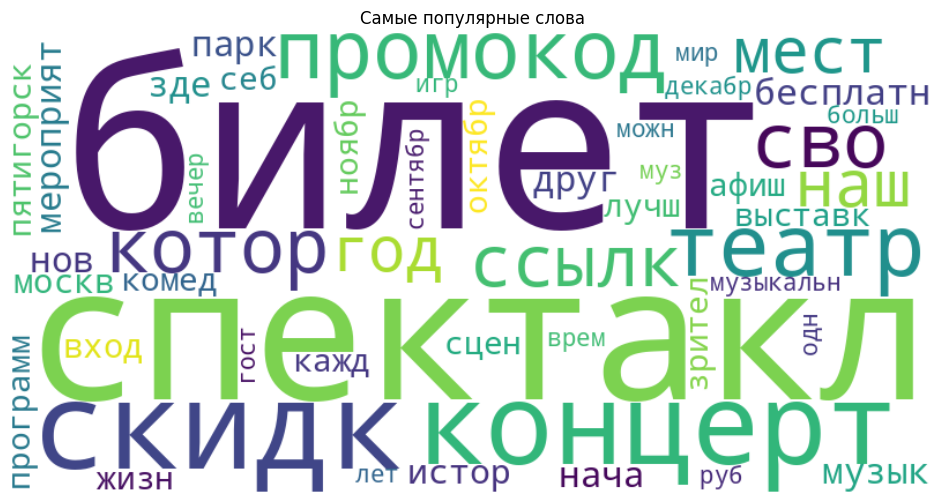

In [28]:
plot_wordcloud(most_common, "Самые популярные слова")

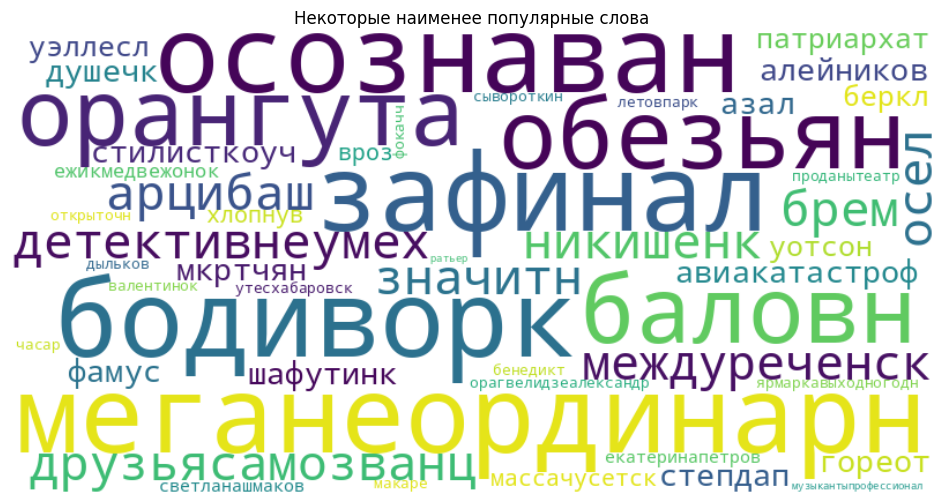

In [29]:
plot_wordcloud(least_common, "Некоторые наименее популярные слова")

убираем слишком редкие и частые слова

In [30]:
# почистим слишком редкие слова (встречаются реже чем в 5 доках/во всех)

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(train_df['processed_text'])

words = np.array(vectorizer.get_feature_names_out())
mask = (np.sum(X > 0, axis=0).A1 > 5) & (np.sum(X > 0, axis=0).A1 <  X.shape[0])

selected_words = set(words[mask])
train_df['filtered_text'] = train_df['processed_text'].progress_apply(lambda x: ' '.join([word for word in x.split() if word in selected_words]))
val_df['filtered_text'] = val_df['processed_text'].progress_apply(lambda x: ' '.join([word for word in x.split() if word in selected_words]))

100%|██████████| 5394/5394 [00:00<00:00, 54910.27it/s]


In [31]:
train_df.head()

,id,text,labels,processed_text,filtered_text
13169,13169,"🔥\n""ИЩУ МУЖА"" --романтическая комедия. Мария ...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",муж романтическ комед мар порошин миха полицей...,муж романтическ комед мар порошин миха полицей...
16471,16471,"Концерт группы «Delicious»\nГде: ""16 Тонн на А...","[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ...",концерт групп тон арбат арбатск арбат когд апр...,концерт групп тон арбат арбатск арбат когд апр...
26681,26681,МАСТЕР КЛАСС\n«Создание карты желаний»\nПогруз...,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",мастер класс создан карт желан погруз атмосфер...,мастер класс создан карт желан погруз атмосфер...
8550,8550,✨\nКерамофест\n✨\n🗓️\n12 июля с 14:00 до 20:00...,"[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, ...",керамофест июл улиц седов дом кажд сможет окун...,июл улиц дом кажд сможет окунут мир творчеств ...
1719,1719,1-4 ноября\nМероприятия пространства для детей...,"[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ...",ноябр мероприят пространств дет подростк мест ...,ноябр мероприят пространств дет подростк мест ...


In [32]:
all_text = ' '.join(train_df['filtered_text'])
word_freq = Counter(all_text.split())
least_common = dict(word_freq.most_common()[:-101:-1])

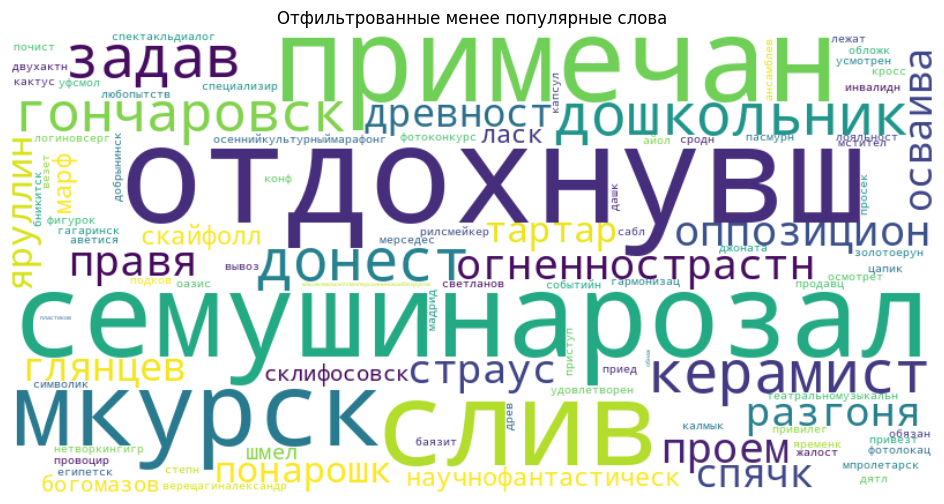

In [33]:
plot_wordcloud(least_common, "Отфильтрованные менее популярные слова")

In [34]:
def generate_ngrams(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return dict(sorted(words_freq, key=lambda x: x[1], reverse=True)[:100])

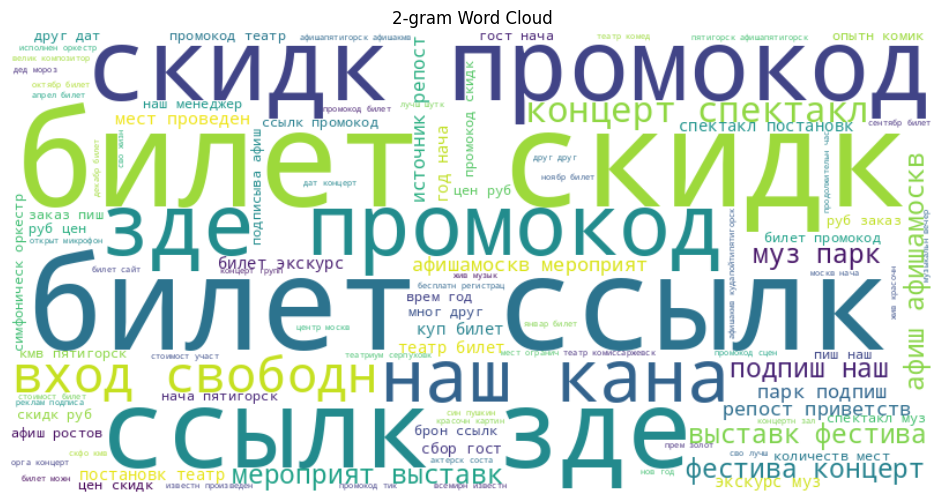

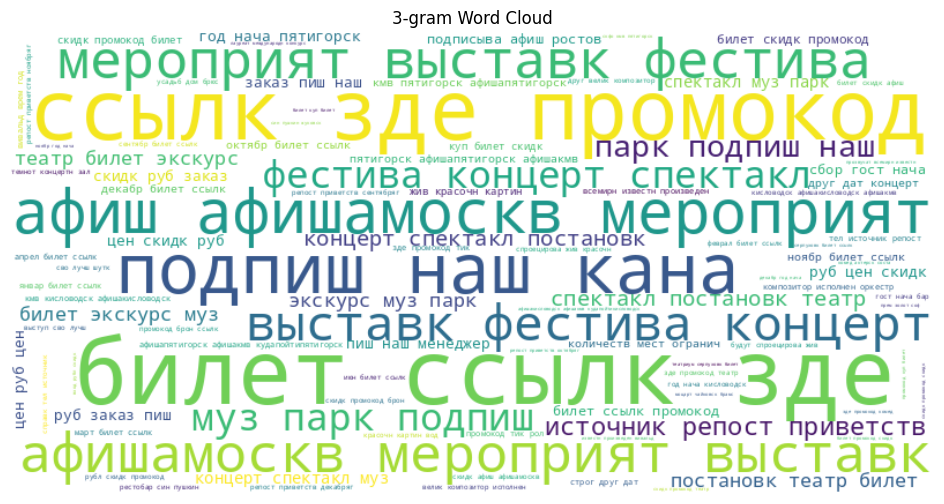

In [35]:
for n in range(2, 4):
    ngram_freq = generate_ngrams(train_df['filtered_text'], n)
    plot_wordcloud(ngram_freq, f"{n}-gram Word Cloud")

также посмотрим на популярные биграммы и триграммы

In [36]:
ngram_freq

{'билет ссылк зде': np.int64(2766),
 'ссылк зде промокод': np.int64(2255),
 'подпиш наш кана': np.int64(1527),
 'афиш афишамоскв мероприят': np.int64(1524),
 'афишамоскв мероприят выставк': np.int64(1524),
 'мероприят выставк фестива': np.int64(1524),
 'выставк фестива концерт': np.int64(1524),
 'фестива концерт спектакл': np.int64(1524),
 'муз парк подпиш': np.int64(1524),
 'парк подпиш наш': np.int64(1524),
 'источник репост приветств': np.int64(1307),
 'концерт спектакл постановк': np.int64(897),
 'спектакл постановк театр': np.int64(897),
 'постановк театр билет': np.int64(897),
 'театр билет экскурс': np.int64(897),
 'билет экскурс муз': np.int64(897),
 'экскурс муз парк': np.int64(897),
 'концерт спектакл муз': np.int64(627),
 'спектакл муз парк': np.int64(627),
 'пиш наш менеджер': np.int64(605),
 'заказ пиш наш': np.int64(604),
 'руб заказ пиш': np.int64(603),
 'цен скидк руб': np.int64(602),
 'руб цен скидк': np.int64(601),
 'скидк руб заказ': np.int64(601),
 'цен руб цен': np

In [37]:
ngram_freq = generate_ngrams(train_df['filtered_text'], 2)
ngram_freq

{'билет скидк': np.int64(4408),
 'билет ссылк': np.int64(4121),
 'ссылк зде': np.int64(2796),
 'скидк промокод': np.int64(2350),
 'зде промокод': np.int64(2284),
 'наш кана': np.int64(1561),
 'вход свободн': np.int64(1547),
 'концерт спектакл': np.int64(1547),
 'фестива концерт': np.int64(1543),
 'муз парк': np.int64(1535),
 'подпиш наш': np.int64(1530),
 'мероприят выставк': np.int64(1526),
 'выставк фестива': np.int64(1526),
 'афиш афишамоскв': np.int64(1525),
 'афишамоскв мероприят': np.int64(1524),
 'парк подпиш': np.int64(1524),
 'репост приветств': np.int64(1512),
 'источник репост': np.int64(1307),
 'мест проведен': np.int64(1206),
 'куп билет': np.int64(1097),
 'год нача': np.int64(1066),
 'театр билет': np.int64(1004),
 'постановк театр': np.int64(971),
 'спектакл постановк': np.int64(910),
 'билет экскурс': np.int64(904),
 'экскурс муз': np.int64(904),
 'сбор гост': np.int64(830),
 'билет промокод': np.int64(681),
 'промокод скидк': np.int64(646),
 'спектакл муз': np.int64(63

--------------------------

## TF-IDF (КАГГЛ)

эта модель стала лучшей на каггле - думаю, дело в качественной предобработке. (+стемминг. лемматизация показывала результаты примерно на 0.02 хуже). взвешивание классов ухудшало результаты, его убрала. включила слова, биграммы, триграммы (с просто словами скор был хуже). ограничила размер словаря.

в каждой функции обучения:
- шедулер (но его поставила на None)
- вормап
- оптимизатор
- ранняя остановка
- сохранение лучшей модели
- отрисовка графиков с лоссом и метрикой

In [38]:
vectorizer = TfidfVectorizer(
    max_features=2000,  # ограничим размер словаря
    ngram_range=(1,3),  # будем чекать и биграммы, и триграммы
)
X_train_tfidf = vectorizer.fit_transform(train_df['filtered_text'])
X_val_tfidf = vectorizer.transform(val_df['filtered_text'])

X_train = X_train_tfidf.toarray()
X_val = X_val_tfidf.toarray()

In [39]:
y_train = np.stack(train_df['labels'].values)
y_val = np.stack(val_df['labels'].values)

In [40]:
class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [41]:
class TfidfDeepNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.2),

            nn.Linear(256, output_dim),
            nn.Sigmoid()  
        )

    def forward(self, x):
        return self.model(x)

In [42]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cuda', eval_steps=100, patience=3, warmup_epochs=2):
    best_f1 = None
    no_improve_epochs = 0
    train_losses, val_losses = [], []
    train_f1s, val_f1s = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_train_losses = []
        all_train_preds, all_train_targets = [], []

        for i, (X_batch, y_batch) in enumerate(tqdm(train_loader, desc=f"Эпоха {epoch}")):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_train_losses.append(loss.item())


            preds = (outputs > 0.5).int().cpu().numpy()
            all_train_preds.append(preds)
            all_train_targets.append(y_batch.cpu().numpy())

            if scheduler and epoch > warmup_epochs:
                scheduler.step()

        all_train_preds = np.concatenate(all_train_preds)
        all_train_targets = np.concatenate(all_train_targets)
        train_f1 = f1_score(all_train_targets, all_train_preds, average='macro')
        train_loss = np.mean(epoch_train_losses)

        train_losses.append(train_loss)
        train_f1s.append(train_f1)

        print(f"[Трейн] Лосс: {train_loss:.4f}, F1: {train_f1:.4f}")

        # валидация
        model.eval()
        val_epoch_losses = []
        all_val_preds, all_val_targets = [], []

        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                loss = criterion(outputs, y_val)
                val_epoch_losses.append(loss.item())


                preds = (outputs > 0.5).int().cpu().numpy()
                all_val_preds.append(preds)
                all_val_targets.append(y_val.cpu().numpy())

        all_val_preds = np.concatenate(all_val_preds)
        all_val_targets = np.concatenate(all_val_targets)
        val_f1 = f1_score(all_val_targets, all_val_preds, average='macro')
        val_loss = np.mean(val_epoch_losses)

        val_losses.append(val_loss)
        val_f1s.append(val_f1)

        print(f"[Валидация] Лосс: {val_loss:.4f}, F1: {val_f1:.4f}")

        if best_f1 is None or val_f1 > best_f1:
            best_f1 = val_f1
            no_improve_epochs = 0
            torch.save(model.state_dict(), "best_model.pt")
            print(f"✅ Сохранили модель с F1: {val_f1:.4f}")
        else:
            no_improve_epochs += 1
            print(f"⏳ Нет улучшений: {no_improve_epochs}/{patience}")
            if no_improve_epochs > patience:
                print("⛔ Ранняя остановка.")
                break

    # графики
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_f1s, label="Train F1")
    plt.plot(epochs, val_f1s, label="Val F1")
    plt.title("F1 Score")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model

In [43]:
# вспомним о том, что у нас несбалансированные классы
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
labels = np.array(train_df['labels'].tolist())

weights = labels.shape[0] / (len(labels.sum(axis=0)) * labels.sum(axis=0))

cl_weights = torch.tensor(weights, dtype=torch.float32).to(device)

Именно здесь методом множественных проб и ошибок выяснилось, что стемминг работает лучше лемматизации

In [44]:
model = TfidfDeepNN(input_dim=X_train.shape[1], output_dim=y_train.shape[1]).to(device)

# тк вселосс, то добавляем в саму модель сигмоиду!
# взвешивание работало хуже, в итоге не добавила
criterion = nn.BCELoss()   
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# с шедулером метрики были хуже
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.0001)

scheduler=None
model.to(device)
num_epochs = 30

Эпоха 1: 100%|██████████| 740/740 [00:04<00:00, 148.54it/s]


[Трейн] Лосс: 0.2908, F1: 0.7156
[Валидация] Лосс: 0.2345, F1: 0.7533
✅ Сохранили модель с F1: 0.7533


Эпоха 2: 100%|██████████| 740/740 [00:05<00:00, 140.02it/s]


[Трейн] Лосс: 0.2347, F1: 0.7614
[Валидация] Лосс: 0.2207, F1: 0.7849
✅ Сохранили модель с F1: 0.7849


Эпоха 3: 100%|██████████| 740/740 [00:05<00:00, 147.96it/s]


[Трейн] Лосс: 0.2136, F1: 0.7897
[Валидация] Лосс: 0.2108, F1: 0.8016
✅ Сохранили модель с F1: 0.8016


Эпоха 4: 100%|██████████| 740/740 [00:05<00:00, 145.11it/s]


[Трейн] Лосс: 0.1958, F1: 0.8122
[Валидация] Лосс: 0.2079, F1: 0.8077
✅ Сохранили модель с F1: 0.8077


Эпоха 5: 100%|██████████| 740/740 [00:05<00:00, 145.59it/s]


[Трейн] Лосс: 0.1834, F1: 0.8261
[Валидация] Лосс: 0.2065, F1: 0.8084
✅ Сохранили модель с F1: 0.8084


Эпоха 6: 100%|██████████| 740/740 [00:05<00:00, 147.25it/s]


[Трейн] Лосс: 0.1699, F1: 0.8439
[Валидация] Лосс: 0.2058, F1: 0.8389
✅ Сохранили модель с F1: 0.8389


Эпоха 7: 100%|██████████| 740/740 [00:05<00:00, 141.80it/s]


[Трейн] Лосс: 0.1593, F1: 0.8551
[Валидация] Лосс: 0.2067, F1: 0.8336
⏳ Нет улучшений: 1/15


Эпоха 8: 100%|██████████| 740/740 [00:05<00:00, 147.77it/s]


[Трейн] Лосс: 0.1504, F1: 0.8703
[Валидация] Лосс: 0.2067, F1: 0.8383
⏳ Нет улучшений: 2/15


Эпоха 9: 100%|██████████| 740/740 [00:05<00:00, 140.45it/s]


[Трейн] Лосс: 0.1408, F1: 0.8725
[Валидация] Лосс: 0.2117, F1: 0.8412
✅ Сохранили модель с F1: 0.8412


Эпоха 10: 100%|██████████| 740/740 [00:05<00:00, 147.99it/s]


[Трейн] Лосс: 0.1347, F1: 0.8873
[Валидация] Лосс: 0.2146, F1: 0.8285
⏳ Нет улучшений: 1/15


Эпоха 11: 100%|██████████| 740/740 [00:05<00:00, 139.48it/s]


[Трейн] Лосс: 0.1255, F1: 0.8886
[Валидация] Лосс: 0.2146, F1: 0.8357
⏳ Нет улучшений: 2/15


Эпоха 12: 100%|██████████| 740/740 [00:04<00:00, 148.72it/s]


[Трейн] Лосс: 0.1220, F1: 0.8923
[Валидация] Лосс: 0.2149, F1: 0.8581
✅ Сохранили модель с F1: 0.8581


Эпоха 13: 100%|██████████| 740/740 [00:05<00:00, 142.07it/s]


[Трейн] Лосс: 0.1132, F1: 0.9024
[Валидация] Лосс: 0.2253, F1: 0.8601
✅ Сохранили модель с F1: 0.8601


Эпоха 14: 100%|██████████| 740/740 [00:05<00:00, 147.58it/s]


[Трейн] Лосс: 0.1101, F1: 0.9096
[Валидация] Лосс: 0.2281, F1: 0.8550
⏳ Нет улучшений: 1/15


Эпоха 15: 100%|██████████| 740/740 [00:05<00:00, 143.31it/s]


[Трейн] Лосс: 0.1042, F1: 0.9091
[Валидация] Лосс: 0.2348, F1: 0.8524
⏳ Нет улучшений: 2/15


Эпоха 16: 100%|██████████| 740/740 [00:05<00:00, 146.39it/s]


[Трейн] Лосс: 0.0990, F1: 0.9154
[Валидация] Лосс: 0.2354, F1: 0.8525
⏳ Нет улучшений: 3/15


Эпоха 17: 100%|██████████| 740/740 [00:05<00:00, 147.69it/s]


[Трейн] Лосс: 0.0960, F1: 0.9221
[Валидация] Лосс: 0.2348, F1: 0.8503
⏳ Нет улучшений: 4/15


Эпоха 18: 100%|██████████| 740/740 [00:05<00:00, 141.40it/s]


[Трейн] Лосс: 0.0928, F1: 0.9215
[Валидация] Лосс: 0.2370, F1: 0.8636
✅ Сохранили модель с F1: 0.8636


Эпоха 19: 100%|██████████| 740/740 [00:04<00:00, 148.64it/s]


[Трейн] Лосс: 0.0894, F1: 0.9251
[Валидация] Лосс: 0.2408, F1: 0.8573
⏳ Нет улучшений: 1/15


Эпоха 20: 100%|██████████| 740/740 [00:05<00:00, 140.20it/s]


[Трейн] Лосс: 0.0855, F1: 0.9305
[Валидация] Лосс: 0.2419, F1: 0.8633
⏳ Нет улучшений: 2/15


Эпоха 21: 100%|██████████| 740/740 [00:04<00:00, 150.16it/s]


[Трейн] Лосс: 0.0833, F1: 0.9309
[Валидация] Лосс: 0.2447, F1: 0.8635
⏳ Нет улучшений: 3/15


Эпоха 22: 100%|██████████| 740/740 [00:05<00:00, 138.09it/s]


[Трейн] Лосс: 0.0805, F1: 0.9339
[Валидация] Лосс: 0.2537, F1: 0.8571
⏳ Нет улучшений: 4/15


Эпоха 23: 100%|██████████| 740/740 [00:05<00:00, 147.15it/s]


[Трейн] Лосс: 0.0796, F1: 0.9346
[Валидация] Лосс: 0.2549, F1: 0.8600
⏳ Нет улучшений: 5/15


Эпоха 24: 100%|██████████| 740/740 [00:07<00:00, 94.29it/s] 


[Трейн] Лосс: 0.0764, F1: 0.9402
[Валидация] Лосс: 0.2599, F1: 0.8554
⏳ Нет улучшений: 6/15


Эпоха 25: 100%|██████████| 740/740 [00:08<00:00, 86.05it/s] 


[Трейн] Лосс: 0.0755, F1: 0.9420
[Валидация] Лосс: 0.2529, F1: 0.8635
⏳ Нет улучшений: 7/15


Эпоха 26: 100%|██████████| 740/740 [00:07<00:00, 98.92it/s] 


[Трейн] Лосс: 0.0726, F1: 0.9391
[Валидация] Лосс: 0.2634, F1: 0.8667
✅ Сохранили модель с F1: 0.8667


Эпоха 27: 100%|██████████| 740/740 [00:08<00:00, 89.88it/s] 


[Трейн] Лосс: 0.0695, F1: 0.9446
[Валидация] Лосс: 0.2573, F1: 0.8604
⏳ Нет улучшений: 1/15


Эпоха 28: 100%|██████████| 740/740 [00:06<00:00, 119.05it/s]


[Трейн] Лосс: 0.0684, F1: 0.9433
[Валидация] Лосс: 0.2654, F1: 0.8618
⏳ Нет улучшений: 2/15


Эпоха 29: 100%|██████████| 740/740 [00:06<00:00, 116.69it/s]


[Трейн] Лосс: 0.0678, F1: 0.9483
[Валидация] Лосс: 0.2663, F1: 0.8617
⏳ Нет улучшений: 3/15


Эпоха 30: 100%|██████████| 740/740 [00:07<00:00, 102.35it/s]


[Трейн] Лосс: 0.0665, F1: 0.9494
[Валидация] Лосс: 0.2735, F1: 0.8563
⏳ Нет улучшений: 4/15


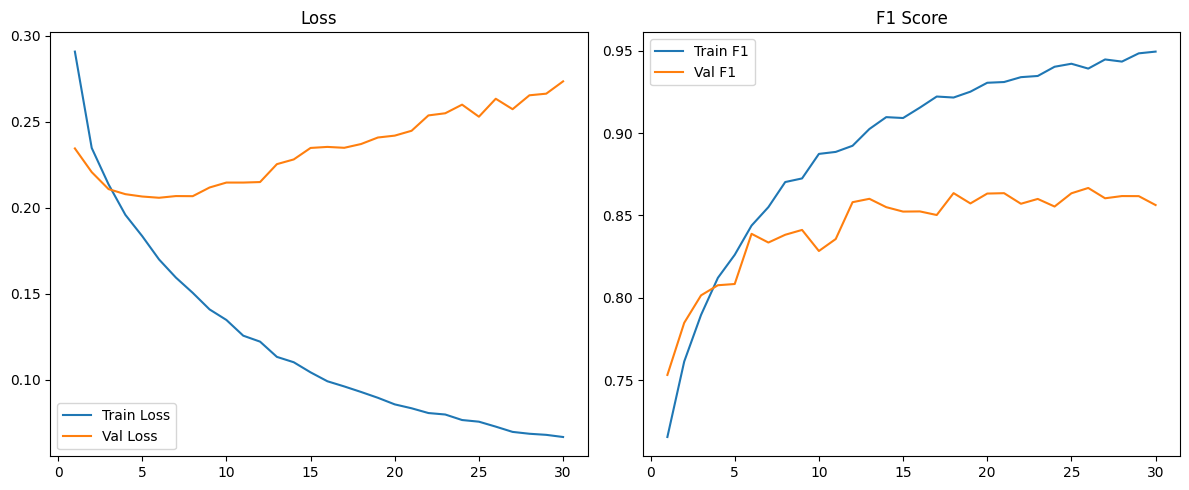

In [83]:
model_idf=train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cuda', eval_steps=100, patience=15, warmup_epochs=8)

## Предскажем на тестовом датасете

In [115]:
df_test = pd.read_csv('/content/test.csv', sep=',', encoding='utf-8')
df_test.head(5)

,id,text
0,29568,"ЭЙ, ВЛЮБЛЁННЫЕ\nСкидка 20% промокоду SYHOYZ\nн..."
1,29569,Пруды Москвы
2,29570,🤪\n🤪\n👏\n👏\n😄\n😄\n👏\n👏\n👨‍👩‍👦\nСемейка лёгкого...
3,29571,24 СЕНТЯБРЯ\nИсторический фестиваль «Башкирия ...
4,29572,19-20 августа\nДетский клуб в кафе «Отдых»\nТе...


In [116]:
df_test['processed_text'] = df_test['text'].progress_apply(lambda x: preprocess_text(x, method='stem'))
df_test['filtered_text'] = df_test['processed_text'].progress_apply(lambda x: ' '.join([word for word in x.split() if word in selected_words]))

100%|██████████| 7392/7392 [00:00<00:00, 76466.40it/s]


In [117]:
df_test

,id,text,processed_text,filtered_text
0,29568,"ЭЙ, ВЛЮБЛЁННЫЕ\nСкидка 20% промокоду SYHOYZ\nн...",влюблен скидк промокод спектакл ежик медвежено...,влюблен скидк промокод спектакл ежик тольк ком...
1,29569,Пруды Москвы,пруд москв,пруд москв
2,29570,🤪\n🤪\n👏\n👏\n😄\n😄\n👏\n👏\n👨‍👩‍👦\nСемейка лёгкого...,семейк легк поведен неожида комед театриум сер...,семейк легк поведен неожида комед театриум сер...
3,29571,24 СЕНТЯБРЯ\nИсторический фестиваль «Башкирия ...,сентябр историческ фестивал башкир общ истор б...,сентябр историческ фестивал башкир общ истор б...
4,29572,19-20 августа\nДетский клуб в кафе «Отдых»\nТе...,август детск клуб каф отд тематическ развлекат...,август детск клуб каф отд тематическ развлекат...
...,...,...,...,...
7387,36955,Концерт «Stabat Mater»\n24 и 25 марта в 20:00\...,концерт март кирочн преддвер пасх стен анненки...,концерт март кирочн преддвер пасх стен анненки...
7388,36956,СПЕКТАКЛЬ «ОДНАЖДЫ…»\nСпектакль для 1 зрителя....,спектакл однажд спектакл зрител есл люб книг с...,спектакл однажд спектакл зрител есл люб книг с...
7389,36957,вт.-пт. 10:00-20:00 можно бесплатно полетать н...,втпт можн бесплатн полета москв аттракцион пол...,втпт можн бесплатн полета москв аттракцион пол...
7390,36958,"ТЕАТРАЛЬНЫЙ СЕЗОН ""НА ВОДАХ""\nс 1 по 9 апреля ...",театральн сезон вод апрел год железноводск гдк...,театральн сезон вод апрел год железноводск гдк...


In [231]:
X_test = vectorizer.transform(df_test['filtered_text'])  

In [232]:
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)  # toarray, если sparse
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [233]:
num_classes = y_train.shape[1]

In [234]:
model_idf.eval()
model_idf.to(device)

TfidfDeepNN(
  (model): Sequential(
    (0): Linear(in_features=3000, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.1)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.1)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): LeakyReLU(negative_slope=0.1)
    (15): Dropout(p=0.2, inplace=False)
    (16): Linear(in_features=25

In [235]:
all_preds = []

with torch.no_grad():
    for batch in test_loader:
        inputs = batch[0].to(device)
        outputs = model_idf(inputs)
        preds = (outputs > 0.5).int().cpu().numpy()
        all_preds.append(preds)

all_preds = np.vstack(all_preds)

In [236]:
preds_str = [' '.join(map(str, row)) for row in all_preds]

In [237]:
# preds_str

In [238]:
my_submit=pd.read_csv('/content/sample_submission.csv')
my_submit['labels']=preds_str

In [239]:
my_submit

,id,labels
0,29568,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
1,29569,0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1
2,29570,0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
3,29571,1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0
4,29572,0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1
...,...,...
7387,36955,0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
7388,36956,0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
7389,36957,0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0
7390,36958,1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0


In [240]:
my_submit.to_csv('23.csv', index=False)

лучший скор на каггле:

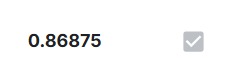

--------------------------

## **Word2vec**

In [ ]:
# токенизируем с помощью nltk
train_tokens = train_df['filtered_text'].apply(word_tokenize)
val_tokens = val_df['filtered_text'].apply(word_tokenize)


w2v_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=1, workers=4, epochs=10)
emb_dim = w2v_model.vector_size

# текст-> вектор
def doc_vector(doc):
    # получаем векторы
    vecs = [w2v_model.wv[word] for word in doc if word in w2v_model.wv]
    #  среднее значение векторов/ нулевой вектор
    return np.mean(vecs, axis=0) if vecs else np.zeros(emb_dim)

X_train_w2v = np.vstack(train_tokens.apply(lambda x: doc_vector(x)))
X_val_w2v = np.vstack(val_tokens.apply(lambda x: doc_vector(x)))

In [ ]:
y_train = np.stack(train_df['labels'].values)
y_val = np.stack(val_df['labels'].values)
input_dim = X_train_w2v.shape[1] 
output_dim = y_train.shape[1]  

In [ ]:
train_data = TensorDataset(torch.tensor(X_train_w2v, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val_w2v, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

In [ ]:
class CompactNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CompactNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, output_dim),
            nn.Sigmoid() 
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_w2v = CompactNN(input_dim=X_train_w2v.shape[1], output_dim=y_train.shape[1]).to(device)
criterion = nn.BCELoss()  
optimizer = optim.Adam(model_w2v.parameters(), lr=1e-3)
# с шедулером метрики были хуже
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.01)

scheduler=None
model_w2v.to(device)
num_epochs = 30

Эпоха 1: 100%|██████████| 370/370 [00:02<00:00, 163.37it/s]


[Трейн] Лосс: 0.3718, F1: 0.6781
[Валидация] Лосс: 0.2883, F1: 0.7210
✅ Сохранили модель с F1: 0.7210


Эпоха 2: 100%|██████████| 370/370 [00:01<00:00, 249.66it/s]


[Трейн] Лосс: 0.3090, F1: 0.7088
[Валидация] Лосс: 0.2773, F1: 0.7285
✅ Сохранили модель с F1: 0.7285


Эпоха 3: 100%|██████████| 370/370 [00:02<00:00, 142.01it/s]


[Трейн] Лосс: 0.2975, F1: 0.7163
[Валидация] Лосс: 0.2691, F1: 0.7317
✅ Сохранили модель с F1: 0.7317


Эпоха 4: 100%|██████████| 370/370 [00:02<00:00, 164.80it/s]


[Трейн] Лосс: 0.2908, F1: 0.7200
[Валидация] Лосс: 0.2627, F1: 0.7343
✅ Сохранили модель с F1: 0.7343


Эпоха 5: 100%|██████████| 370/370 [00:01<00:00, 256.50it/s]


[Трейн] Лосс: 0.2855, F1: 0.7235
[Валидация] Лосс: 0.2599, F1: 0.7383
✅ Сохранили модель с F1: 0.7383


Эпоха 6: 100%|██████████| 370/370 [00:01<00:00, 216.79it/s]


[Трейн] Лосс: 0.2816, F1: 0.7271
[Валидация] Лосс: 0.2572, F1: 0.7393
✅ Сохранили модель с F1: 0.7393


Эпоха 7: 100%|██████████| 370/370 [00:02<00:00, 149.47it/s]


[Трейн] Лосс: 0.2788, F1: 0.7280
[Валидация] Лосс: 0.2566, F1: 0.7399
✅ Сохранили модель с F1: 0.7399


Эпоха 8: 100%|██████████| 370/370 [00:02<00:00, 152.80it/s]


[Трейн] Лосс: 0.2771, F1: 0.7322
[Валидация] Лосс: 0.2515, F1: 0.7420
✅ Сохранили модель с F1: 0.7420


Эпоха 9: 100%|██████████| 370/370 [00:01<00:00, 251.93it/s]


[Трейн] Лосс: 0.2739, F1: 0.7333
[Валидация] Лосс: 0.2503, F1: 0.7435
✅ Сохранили модель с F1: 0.7435


Эпоха 10: 100%|██████████| 370/370 [00:01<00:00, 258.34it/s]


[Трейн] Лосс: 0.2721, F1: 0.7346
[Валидация] Лосс: 0.2498, F1: 0.7450
✅ Сохранили модель с F1: 0.7450


Эпоха 11: 100%|██████████| 370/370 [00:01<00:00, 253.66it/s]


[Трейн] Лосс: 0.2693, F1: 0.7390
[Валидация] Лосс: 0.2456, F1: 0.7499
✅ Сохранили модель с F1: 0.7499


Эпоха 12: 100%|██████████| 370/370 [00:01<00:00, 219.94it/s]


[Трейн] Лосс: 0.2681, F1: 0.7393
[Валидация] Лосс: 0.2475, F1: 0.7477
⏳ Нет улучшений: 1/7


Эпоха 13: 100%|██████████| 370/370 [00:01<00:00, 202.53it/s]


[Трейн] Лосс: 0.2669, F1: 0.7407
[Валидация] Лосс: 0.2532, F1: 0.7429
⏳ Нет улучшений: 2/7


Эпоха 14: 100%|██████████| 370/370 [00:01<00:00, 254.45it/s]


[Трейн] Лосс: 0.2643, F1: 0.7415
[Валидация] Лосс: 0.2427, F1: 0.7475
⏳ Нет улучшений: 3/7


Эпоха 15: 100%|██████████| 370/370 [00:01<00:00, 239.88it/s]


[Трейн] Лосс: 0.2633, F1: 0.7411
[Валидация] Лосс: 0.2431, F1: 0.7483
⏳ Нет улучшений: 4/7


Эпоха 16: 100%|██████████| 370/370 [00:01<00:00, 252.07it/s]


[Трейн] Лосс: 0.2614, F1: 0.7423
[Валидация] Лосс: 0.2403, F1: 0.7538
✅ Сохранили модель с F1: 0.7538


Эпоха 17: 100%|██████████| 370/370 [00:01<00:00, 261.94it/s]


[Трейн] Лосс: 0.2596, F1: 0.7442
[Валидация] Лосс: 0.2438, F1: 0.7469
⏳ Нет улучшений: 1/7


Эпоха 18: 100%|██████████| 370/370 [00:01<00:00, 251.83it/s]


[Трейн] Лосс: 0.2591, F1: 0.7445
[Валидация] Лосс: 0.2433, F1: 0.7521
⏳ Нет улучшений: 2/7


Эпоха 19: 100%|██████████| 370/370 [00:01<00:00, 211.74it/s]


[Трейн] Лосс: 0.2572, F1: 0.7468
[Валидация] Лосс: 0.2411, F1: 0.7497
⏳ Нет улучшений: 3/7


Эпоха 20: 100%|██████████| 370/370 [00:01<00:00, 212.33it/s]


[Трейн] Лосс: 0.2560, F1: 0.7467
[Валидация] Лосс: 0.2389, F1: 0.7524
⏳ Нет улучшений: 4/7


Эпоха 21: 100%|██████████| 370/370 [00:01<00:00, 258.69it/s]


[Трейн] Лосс: 0.2538, F1: 0.7486
[Валидация] Лосс: 0.2365, F1: 0.7519
⏳ Нет улучшений: 5/7


Эпоха 22: 100%|██████████| 370/370 [00:01<00:00, 256.14it/s]


[Трейн] Лосс: 0.2531, F1: 0.7492
[Валидация] Лосс: 0.2385, F1: 0.7546
✅ Сохранили модель с F1: 0.7546


Эпоха 23: 100%|██████████| 370/370 [00:01<00:00, 253.57it/s]


[Трейн] Лосс: 0.2530, F1: 0.7505
[Валидация] Лосс: 0.2378, F1: 0.7533
⏳ Нет улучшений: 1/7


Эпоха 24: 100%|██████████| 370/370 [00:01<00:00, 255.44it/s]


[Трейн] Лосс: 0.2524, F1: 0.7518
[Валидация] Лосс: 0.2379, F1: 0.7547
✅ Сохранили модель с F1: 0.7547


Эпоха 25: 100%|██████████| 370/370 [00:01<00:00, 249.80it/s]


[Трейн] Лосс: 0.2515, F1: 0.7502
[Валидация] Лосс: 0.2348, F1: 0.7560
✅ Сохранили модель с F1: 0.7560


Эпоха 26: 100%|██████████| 370/370 [00:01<00:00, 207.47it/s]


[Трейн] Лосс: 0.2507, F1: 0.7504
[Валидация] Лосс: 0.2361, F1: 0.7569
✅ Сохранили модель с F1: 0.7569


Эпоха 27: 100%|██████████| 370/370 [00:01<00:00, 187.63it/s]


[Трейн] Лосс: 0.2494, F1: 0.7521
[Валидация] Лосс: 0.2332, F1: 0.7567
⏳ Нет улучшений: 1/7


Эпоха 28: 100%|██████████| 370/370 [00:01<00:00, 261.50it/s]


[Трейн] Лосс: 0.2483, F1: 0.7534
[Валидация] Лосс: 0.2357, F1: 0.7554
⏳ Нет улучшений: 2/7


Эпоха 29: 100%|██████████| 370/370 [00:01<00:00, 256.86it/s]


[Трейн] Лосс: 0.2473, F1: 0.7530
[Валидация] Лосс: 0.2319, F1: 0.7595
✅ Сохранили модель с F1: 0.7595


Эпоха 30: 100%|██████████| 370/370 [00:01<00:00, 258.09it/s]


[Трейн] Лосс: 0.2468, F1: 0.7540
[Валидация] Лосс: 0.2316, F1: 0.7634
✅ Сохранили модель с F1: 0.7634


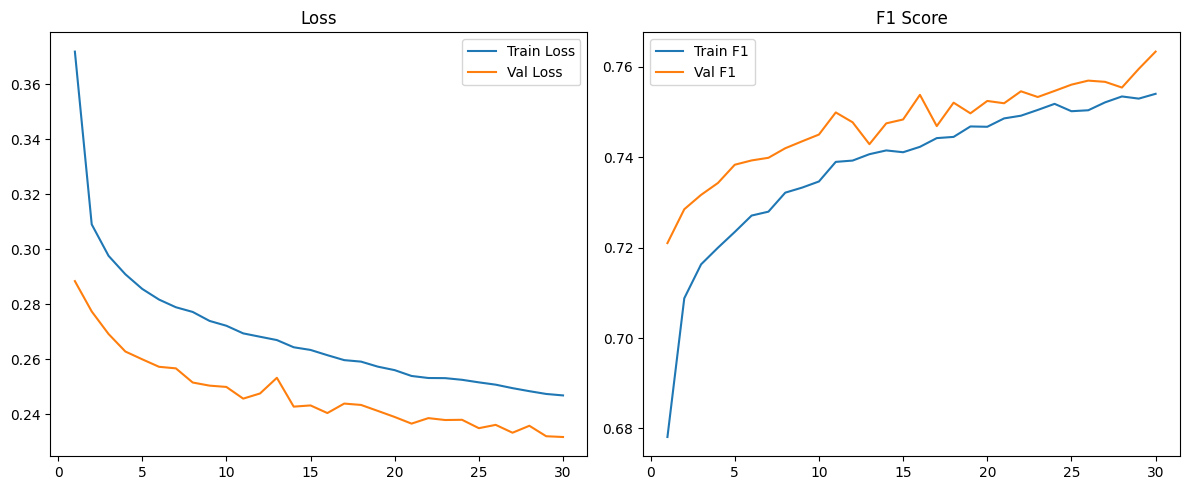

In [ ]:
model_idf=train_model(model_w2v, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, device='cuda', eval_steps=100, patience=7, warmup_epochs=2)

сработало довольно плохо по сравнению с тф-айдф, так что даже не буду предиктить

-----------------------------

## Встроенные эмбеддинги + CNN

In [ ]:
train_tokens = train_df['filtered_text'].apply(lambda x: x.split())
val_tokens = val_df['filtered_text'].apply(lambda x: x.split())

In [ ]:
y_train = np.stack(train_df['labels'].values)
y_val = np.stack(val_df['labels'].values)

In [ ]:
all_words = [word for tokens in train_tokens for word in tokens]

#  слово -> индекс + служебный паддинг, чтобы все было одного размера
word_counts = Counter(all_words)
vocab = {word: idx + 1 for idx, (word, _) in enumerate(word_counts.items())}
vocab['<PAD>'] = 0
reverse_vocab = {idx: word for word, idx in vocab.items()}

In [ ]:
def text_to_indices(tokens, vocab):
    return [vocab.get(word, vocab['<PAD>']) for word in tokens]

In [ ]:
# сначала в индексы
X_train_indices = train_tokens.apply(lambda x: text_to_indices(x, vocab))
X_val_indices = val_tokens.apply(lambda x: text_to_indices(x, vocab))

In [ ]:
# потом в тензоры
X_train_tensor = [torch.tensor(indices) for indices in X_train_indices]
X_val_tensor = [torch.tensor(indices) for indices in X_val_indices]

In [ ]:
# паддингуем 
X_train_padded = pad_sequence(X_train_tensor, batch_first=True, padding_value=vocab['<PAD>'])
X_val_padded = pad_sequence(X_val_tensor, batch_first=True, padding_value=vocab['<PAD>'])

In [ ]:
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32)
y_val_tensor = torch.tensor(np.array(y_val), dtype=torch.float32)

train_data = TensorDataset(X_train_padded, y_train_tensor)
val_data = TensorDataset(X_val_padded, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

In [ ]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_size, num_classes, kernel_sizes=[3, 4, 5], num_filters=100):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.convs = nn.ModuleList([nn.Conv2d(1, num_filters, (k, embed_size)) for k in kernel_sizes])
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_classes)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Добавляем размерность для канала
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs]  # Применяем свертки
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # Пуллинг
        x = torch.cat(x, dim=1)  # Соединяем результаты
        return torch.sigmoid(self.fc(x))  # Мультилейбл задача

In [ ]:
vocab_size = len(vocab)
embed_size = 100
num_classes = 20
model_emb = TextCNN(vocab_size, embed_size, num_classes)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.BCELoss()  
optimizer = optim.Adam(model_emb.parameters(), lr=1e-3)
# с шедулером метрики были хуже
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.01)

scheduler=None
model_emb.to(device)
num_epochs = 30

In [ ]:
def train_model_1(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cuda', eval_steps=100, patience=3, warmup_epochs=2):
    best_f1 = None
    no_improve_epochs = 0
    train_losses, val_losses = [], []
    train_f1s, val_f1s = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_train_losses = []
        all_train_preds, all_train_targets = [], []

        for i, (X_batch, y_batch) in enumerate(tqdm(train_loader, desc=f"Эпоха {epoch}")):
            X_batch, y_batch = X_batch.long().to(device), y_batch.to(device)  # не забываем опять несчастный long

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_train_losses.append(loss.item())


            preds = (outputs > 0.5).int().cpu().numpy()
            all_train_preds.append(preds)
            all_train_targets.append(y_batch.cpu().numpy())

            if scheduler and epoch > warmup_epochs:
                scheduler.step()

        all_train_preds = np.concatenate(all_train_preds)
        all_train_targets = np.concatenate(all_train_targets)
        train_f1 = f1_score(all_train_targets, all_train_preds, average='macro')
        train_loss = np.mean(epoch_train_losses)

        train_losses.append(train_loss)
        train_f1s.append(train_f1)

        print(f"[Трейн] Лосс: {train_loss:.4f}, F1: {train_f1:.4f}")

        # валидация
        model.eval()
        val_epoch_losses = []
        all_val_preds, all_val_targets = [], []

        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                loss = criterion(outputs, y_val)
                val_epoch_losses.append(loss.item())


                preds = (outputs > 0.5).int().cpu().numpy()
                all_val_preds.append(preds)
                all_val_targets.append(y_val.cpu().numpy())

        all_val_preds = np.concatenate(all_val_preds)
        all_val_targets = np.concatenate(all_val_targets)
        val_f1 = f1_score(all_val_targets, all_val_preds, average='macro')
        val_loss = np.mean(val_epoch_losses)

        val_losses.append(val_loss)
        val_f1s.append(val_f1)

        print(f"[Валидация] Лосс: {val_loss:.4f}, F1: {val_f1:.4f}")

        if best_f1 is None or val_f1 > best_f1:
            best_f1 = val_f1
            no_improve_epochs = 0
            torch.save(model.state_dict(), "best_model.pt")
            print(f"✅ Сохранили модель с F1: {val_f1:.4f}")
        else:
            no_improve_epochs += 1
            print(f"⏳ Нет улучшений: {no_improve_epochs}/{patience}")
            if no_improve_epochs > patience:
                print("⛔ Ранняя остановка.")
                break

    # графики
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_f1s, label="Train F1")
    plt.plot(epochs, val_f1s, label="Val F1")
    plt.title("F1 Score")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model

Эпоха 1: 100%|██████████| 740/740 [00:04<00:00, 149.82it/s]


[Трейн] Лосс: 0.0194, F1: 0.9932
[Валидация] Лосс: 0.5275, F1: 0.8506
✅ Сохранили модель с F1: 0.8506


Эпоха 2: 100%|██████████| 740/740 [00:04<00:00, 152.37it/s]


[Трейн] Лосс: 0.0187, F1: 0.9885
[Валидация] Лосс: 0.5429, F1: 0.8344
⏳ Нет улучшений: 1/10


Эпоха 3: 100%|██████████| 740/740 [00:04<00:00, 150.22it/s]


[Трейн] Лосс: 0.0187, F1: 0.9913
[Валидация] Лосс: 0.5413, F1: 0.8528
✅ Сохранили модель с F1: 0.8528


Эпоха 4: 100%|██████████| 740/740 [00:04<00:00, 150.51it/s]


[Трейн] Лосс: 0.0178, F1: 0.9940
[Валидация] Лосс: 0.6160, F1: 0.8490
⏳ Нет улучшений: 1/10


Эпоха 5: 100%|██████████| 740/740 [00:05<00:00, 147.16it/s]


[Трейн] Лосс: 0.0186, F1: 0.9925
[Валидация] Лосс: 0.5857, F1: 0.8386
⏳ Нет улучшений: 2/10


Эпоха 6: 100%|██████████| 740/740 [00:04<00:00, 148.42it/s]


[Трейн] Лосс: 0.0177, F1: 0.9923
[Валидация] Лосс: 0.5899, F1: 0.8497
⏳ Нет улучшений: 3/10


Эпоха 7: 100%|██████████| 740/740 [00:05<00:00, 146.31it/s]


[Трейн] Лосс: 0.0180, F1: 0.9940
[Валидация] Лосс: 0.6394, F1: 0.8468
⏳ Нет улучшений: 4/10


Эпоха 8: 100%|██████████| 740/740 [00:04<00:00, 149.65it/s]


[Трейн] Лосс: 0.0183, F1: 0.9923
[Валидация] Лосс: 0.6138, F1: 0.8340
⏳ Нет улучшений: 5/10


Эпоха 9: 100%|██████████| 740/740 [00:05<00:00, 147.69it/s]


[Трейн] Лосс: 0.0238, F1: 0.9456
[Валидация] Лосс: 0.6943, F1: 0.8324
⏳ Нет улучшений: 6/10


Эпоха 10: 100%|██████████| 740/740 [00:04<00:00, 151.34it/s]


[Трейн] Лосс: 0.0178, F1: 0.9907
[Валидация] Лосс: 0.7419, F1: 0.8525
⏳ Нет улучшений: 7/10


Эпоха 11: 100%|██████████| 740/740 [00:04<00:00, 150.32it/s]


[Трейн] Лосс: 0.0179, F1: 0.9894
[Валидация] Лосс: 0.7041, F1: 0.8389
⏳ Нет улучшений: 8/10


Эпоха 12: 100%|██████████| 740/740 [00:04<00:00, 151.11it/s]


[Трейн] Лосс: 0.0181, F1: 0.9938
[Валидация] Лосс: 0.7265, F1: 0.8482
⏳ Нет улучшений: 9/10


Эпоха 13: 100%|██████████| 740/740 [00:04<00:00, 152.11it/s]


[Трейн] Лосс: 0.0190, F1: 0.9946
[Валидация] Лосс: 0.7088, F1: 0.8448
⏳ Нет улучшений: 10/10


Эпоха 14: 100%|██████████| 740/740 [00:04<00:00, 150.41it/s]


[Трейн] Лосс: 0.0185, F1: 0.9943
[Валидация] Лосс: 0.7212, F1: 0.8517
⏳ Нет улучшений: 11/10
⛔ Ранняя остановка.


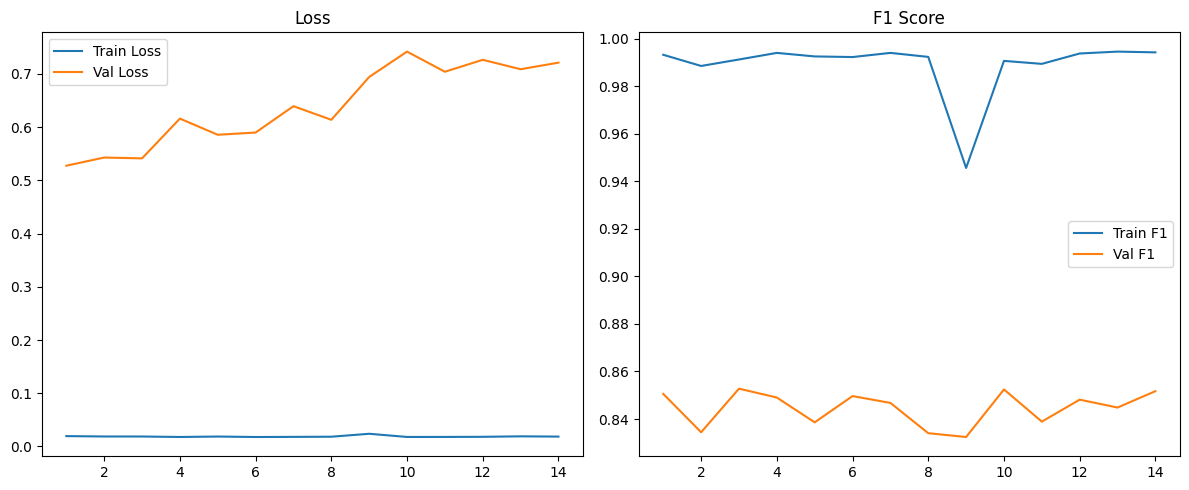

In [ ]:
model_emb=train_model_1(model_emb, train_loader, val_loader, criterion, optimizer, scheduler,num_epochs, device='cuda', eval_steps=100, patience=10, warmup_epochs=2)

все еще хуже могучего тф-айдф

## Предскажем на тестовом датасете

In [ ]:
df_test = pd.read_csv('/content/test.csv', sep=',', encoding='utf-8')
df_test['processed_text'] = df_test['text'].progress_apply(lambda x: preprocess_text(x, method='lemmatize'))
df_test['processed_text'] = df_test['processed_text'].apply(lambda x: x.split())


test_indices = [[vocab.get(token, 0) for token in tokens] for tokens in df_test['processed_text']]


test_tensors = [torch.tensor(seq, dtype=torch.long) for seq in test_indices]
test_padded = pad_sequence(test_tensors, batch_first=True, padding_value=vocab['<PAD>'])

test_dataset = TensorDataset(test_padded)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 7392/7392 [01:23<00:00, 88.58it/s] 


In [ ]:
model_emb.eval()
model_emb.to('cuda')

all_test_preds = []

with torch.no_grad():
    for batch in test_loader:
        X_batch = batch[0].to('cuda').long()  # не забываем опять несчастный long
        outputs = model_emb(X_batch)
        preds = (outputs > 0.5).int().cpu().numpy()
        all_test_preds.append(preds)

all_test_preds = np.vstack(all_test_preds)

In [ ]:
preds_str = [' '.join(map(str, row)) for row in all_test_preds]
my_submit=pd.read_csv('/content/sample_submission.csv')
my_submit['labels']=preds_str

In [ ]:
my_submit

,id,labels
0,29568,1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0
1,29569,0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
2,29570,0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
3,29571,1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0
4,29572,1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1
...,...,...
7387,36955,0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0
7388,36956,1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0
7389,36957,0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
7390,36958,1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0


In [ ]:
my_submit.to_csv('5.csv', index=False)

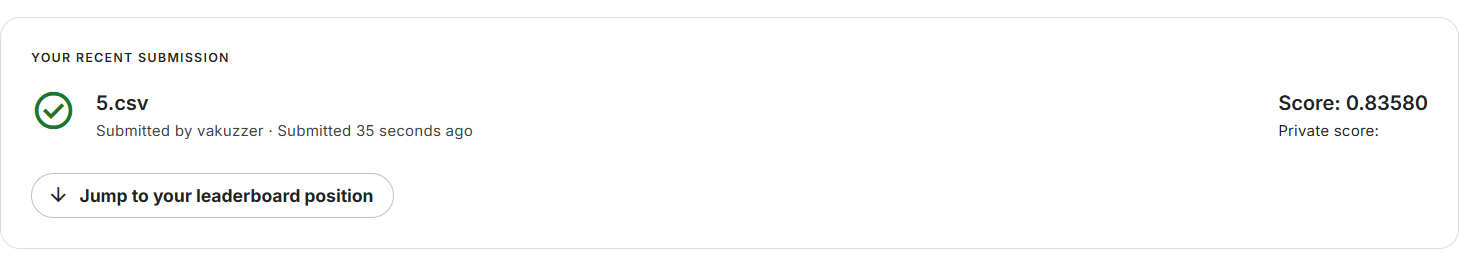

---------

## Эмбеддинги + RNN (GRU)

в качестве RNN я решила взять GRU, потому что он быстрее и чуть легче LSTM. еще также решила попробовать сделать его двусторонним

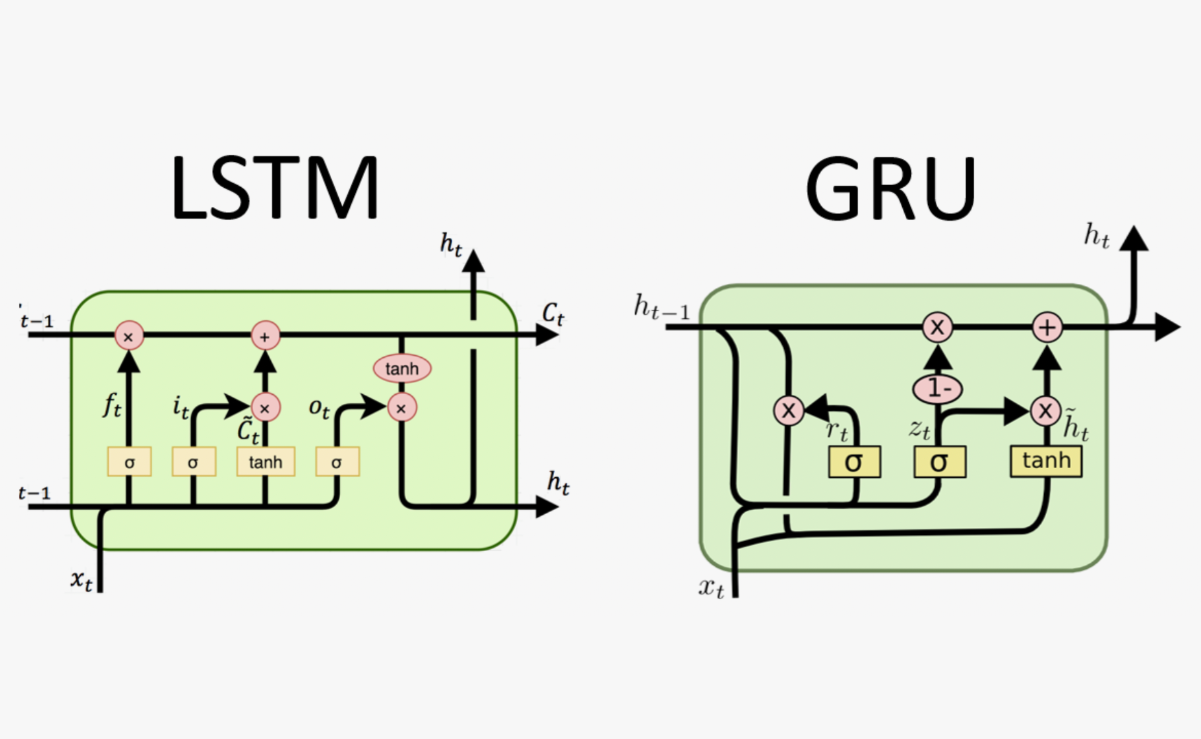

In [ ]:
train_tokens = train_df['filtered_text'].apply(lambda x: x.split())
val_tokens = val_df['filtered_text'].apply(lambda x: x.split())

In [ ]:
all_tokens = [token for sublist in train_tokens for token in sublist]
token_counts = Counter(all_tokens)
vocab = sorted(token_counts, key=token_counts.get, reverse=True)
num_labels = 20

# помимо паддинга добавим в служебку еще и unk- для неизвестных
pad_tok = "<PAD>"
unk_tok = "<UNK>"

# добавим их в словарь
if pad_tok not in vocab:
    vocab.insert(0, pad_tok)
if unk_tok not in vocab:
    vocab.insert(1, unk_tok)

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

VOCAB_SIZE = len(vocab)
PAD_IDX = word_to_ix[pad_tok]

# опять текст -> индексы
def text_to_indices(text_tokens, word_to_ix_map):
    return [word_to_ix_map.get(token, word_to_ix_map[unk_tok]) for token in text_tokens]

train_indices = [text_to_indices(tokens, word_to_ix) for tokens in train_tokens]
val_indices = [text_to_indices(tokens, word_to_ix) for tokens in val_tokens]


def parse_labels(label_str):
    return [int(char) for char in label_str]

train_labels_parsed = [parse_labels(label) for label in train_df['labels']]
val_labels_parsed = [parse_labels(label) for label in val_df['labels']]


class TextDataset(Dataset):
    def __init__(self, texts_indices, labels):
        self.texts_indices = texts_indices
        self.labels = labels

    def __len__(self):
        return len(self.texts_indices)

    def __getitem__(self, idx):
        text = torch.tensor(self.texts_indices[idx], dtype=torch.long)
        #  float для все с логитами
        label = torch.tensor(self.labels[idx], dtype=torch.float)
        return text, label

def collate_fn(batch):
    texts, labels = zip(*batch)
    # паддингуем
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=PAD_IDX)
    labels = torch.stack(labels)
    return texts_padded, labels


train_dataset = TextDataset(train_indices, train_labels_parsed)
val_dataset = TextDataset(val_indices, val_labels_parsed)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


# зададим сам гру
class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.gru = nn.GRU(embedding_dim,
                          hidden_dim,
                          num_layers=n_layers,
                          bidirectional=bidirectional,
                          batch_first=True, 
                          dropout=dropout if n_layers > 1 else 0) # между слоями


        # тк хочу двусторонний (двунаправленный гру), то выход удваиваем
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):

        embedded = self.dropout(self.embedding(text))
        # берем скрытый слой
        _, hidden = self.gru(embedded)

        if self.gru.bidirectional:
            # конкатим скрытые слои (прямой и обратный)
            # hidden[-2,:,:] - последний скрытый слой прямого направления
            # hidden[-1,:,:] - последний скрытый слой обратного направления
            
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            # просто берем скрытое состояние последнего слоя
            hidden = self.dropout(hidden[-1,:,:])
        # тут я решила поэкспериментировать с лоссом, так что сигмоиды не будет
        output = self.fc(hidden)
        return output
 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_gru = GRUClassifier(VOCAB_SIZE, 100, 256, num_labels,  2, True , 0.2 , PAD_IDX).to(device)

optimizer = optim.Adam(model_gru.parameters(), lr=0.001)
# тут ради эксперимента попробуем логитную энтропию
criterion = nn.BCEWithLogitsLoss().to(device)

# шедулер также оставим неактивированным
scheduler = None 

Эпоха 1: 100%|██████████| 740/740 [00:16<00:00, 45.01it/s]


[Трейн] Лосс: 0.2999, F1: 0.6953
[Валидация] Лосс: 0.2393, F1: 0.7491
✅ Сохранили модель с F1: 0.7491


Эпоха 2: 100%|██████████| 740/740 [00:18<00:00, 40.25it/s]


[Трейн] Лосс: 0.2258, F1: 0.7496
[Валидация] Лосс: 0.2121, F1: 0.7754
✅ Сохранили модель с F1: 0.7754


Эпоха 3: 100%|██████████| 740/740 [00:17<00:00, 43.47it/s]


[Трейн] Лосс: 0.1976, F1: 0.7869
[Валидация] Лосс: 0.2046, F1: 0.7877
✅ Сохранили модель с F1: 0.7877


Эпоха 4: 100%|██████████| 740/740 [00:17<00:00, 42.88it/s]


[Трейн] Лосс: 0.1763, F1: 0.8094
[Валидация] Лосс: 0.1979, F1: 0.8049
✅ Сохранили модель с F1: 0.8049


Эпоха 5: 100%|██████████| 740/740 [00:17<00:00, 41.80it/s]


[Трейн] Лосс: 0.1574, F1: 0.8430
[Валидация] Лосс: 0.2000, F1: 0.8140
✅ Сохранили модель с F1: 0.8140


Эпоха 6: 100%|██████████| 740/740 [00:17<00:00, 41.69it/s]


[Трейн] Лосс: 0.1429, F1: 0.8554
[Валидация] Лосс: 0.2106, F1: 0.8067
⏳ Нет улучшений: 1/10


Эпоха 7: 100%|██████████| 740/740 [00:17<00:00, 42.56it/s]


[Трейн] Лосс: 0.1300, F1: 0.8684
[Валидация] Лосс: 0.1999, F1: 0.8271
✅ Сохранили модель с F1: 0.8271


Эпоха 8: 100%|██████████| 740/740 [00:17<00:00, 41.95it/s]


[Трейн] Лосс: 0.1194, F1: 0.8856
[Валидация] Лосс: 0.2065, F1: 0.8308
✅ Сохранили модель с F1: 0.8308


Эпоха 9: 100%|██████████| 740/740 [00:17<00:00, 42.82it/s]


[Трейн] Лосс: 0.1113, F1: 0.8848
[Валидация] Лосс: 0.2157, F1: 0.8247
⏳ Нет улучшений: 1/10


Эпоха 10: 100%|██████████| 740/740 [00:17<00:00, 42.17it/s]


[Трейн] Лосс: 0.1038, F1: 0.8978
[Валидация] Лосс: 0.2272, F1: 0.8262
⏳ Нет улучшений: 2/10


Эпоха 11: 100%|██████████| 740/740 [00:17<00:00, 42.91it/s]


[Трейн] Лосс: 0.0984, F1: 0.9031
[Валидация] Лосс: 0.2318, F1: 0.8365
✅ Сохранили модель с F1: 0.8365


Эпоха 12: 100%|██████████| 740/740 [00:17<00:00, 42.59it/s]


[Трейн] Лосс: 0.0940, F1: 0.9093
[Валидация] Лосс: 0.2335, F1: 0.8390
✅ Сохранили модель с F1: 0.8390


Эпоха 13: 100%|██████████| 740/740 [00:17<00:00, 42.05it/s]


[Трейн] Лосс: 0.0898, F1: 0.9177
[Валидация] Лосс: 0.2335, F1: 0.8395
✅ Сохранили модель с F1: 0.8395


Эпоха 14: 100%|██████████| 740/740 [00:17<00:00, 42.58it/s]


[Трейн] Лосс: 0.0872, F1: 0.9160
[Валидация] Лосс: 0.2316, F1: 0.8432
✅ Сохранили модель с F1: 0.8432


Эпоха 15: 100%|██████████| 740/740 [00:17<00:00, 43.05it/s]


[Трейн] Лосс: 0.0843, F1: 0.9247
[Валидация] Лосс: 0.2545, F1: 0.8430
⏳ Нет улучшений: 1/10


Эпоха 16: 100%|██████████| 740/740 [00:17<00:00, 42.77it/s]


[Трейн] Лосс: 0.0812, F1: 0.9239
[Валидация] Лосс: 0.2385, F1: 0.8431
⏳ Нет улучшений: 2/10


Эпоха 17: 100%|██████████| 740/740 [00:17<00:00, 42.81it/s]


[Трейн] Лосс: 0.0798, F1: 0.9284
[Валидация] Лосс: 0.2464, F1: 0.8363
⏳ Нет улучшений: 3/10


Эпоха 18: 100%|██████████| 740/740 [00:17<00:00, 42.83it/s]


[Трейн] Лосс: 0.0776, F1: 0.9289
[Валидация] Лосс: 0.2455, F1: 0.8458
✅ Сохранили модель с F1: 0.8458


Эпоха 19: 100%|██████████| 740/740 [00:17<00:00, 42.92it/s]


[Трейн] Лосс: 0.0765, F1: 0.9331
[Валидация] Лосс: 0.2501, F1: 0.8457
⏳ Нет улучшений: 1/10


Эпоха 20: 100%|██████████| 740/740 [00:17<00:00, 43.12it/s]


[Трейн] Лосс: 0.0753, F1: 0.9307
[Валидация] Лосс: 0.2548, F1: 0.8467
✅ Сохранили модель с F1: 0.8467


Эпоха 21: 100%|██████████| 740/740 [00:17<00:00, 42.52it/s]


[Трейн] Лосс: 0.0739, F1: 0.9296
[Валидация] Лосс: 0.2603, F1: 0.8523
✅ Сохранили модель с F1: 0.8523


Эпоха 22: 100%|██████████| 740/740 [00:17<00:00, 42.73it/s]


[Трейн] Лосс: 0.0725, F1: 0.9349
[Валидация] Лосс: 0.2596, F1: 0.8479
⏳ Нет улучшений: 1/10


Эпоха 23: 100%|██████████| 740/740 [00:17<00:00, 42.63it/s]


[Трейн] Лосс: 0.0725, F1: 0.9388
[Валидация] Лосс: 0.2568, F1: 0.8504
⏳ Нет улучшений: 2/10


Эпоха 24: 100%|██████████| 740/740 [00:17<00:00, 42.89it/s]


[Трейн] Лосс: 0.0713, F1: 0.9352
[Валидация] Лосс: 0.2693, F1: 0.8504
⏳ Нет улучшений: 3/10


Эпоха 25: 100%|██████████| 740/740 [00:17<00:00, 42.41it/s]


[Трейн] Лосс: 0.0718, F1: 0.9375
[Валидация] Лосс: 0.2634, F1: 0.8501
⏳ Нет улучшений: 4/10


Эпоха 26: 100%|██████████| 740/740 [00:17<00:00, 43.08it/s]


[Трейн] Лосс: 0.0709, F1: 0.9350
[Валидация] Лосс: 0.2601, F1: 0.8476
⏳ Нет улучшений: 5/10


Эпоха 27: 100%|██████████| 740/740 [00:17<00:00, 42.62it/s]


[Трейн] Лосс: 0.0689, F1: 0.9403
[Валидация] Лосс: 0.2693, F1: 0.8490
⏳ Нет улучшений: 6/10


Эпоха 28: 100%|██████████| 740/740 [00:17<00:00, 42.49it/s]


[Трейн] Лосс: 0.0700, F1: 0.9391
[Валидация] Лосс: 0.2713, F1: 0.8438
⏳ Нет улучшений: 7/10


Эпоха 29: 100%|██████████| 740/740 [00:17<00:00, 43.23it/s]


[Трейн] Лосс: 0.0690, F1: 0.9402
[Валидация] Лосс: 0.2702, F1: 0.8518
⏳ Нет улучшений: 8/10


Эпоха 30: 100%|██████████| 740/740 [00:17<00:00, 42.31it/s]


[Трейн] Лосс: 0.0689, F1: 0.9399
[Валидация] Лосс: 0.2782, F1: 0.8465
⏳ Нет улучшений: 9/10


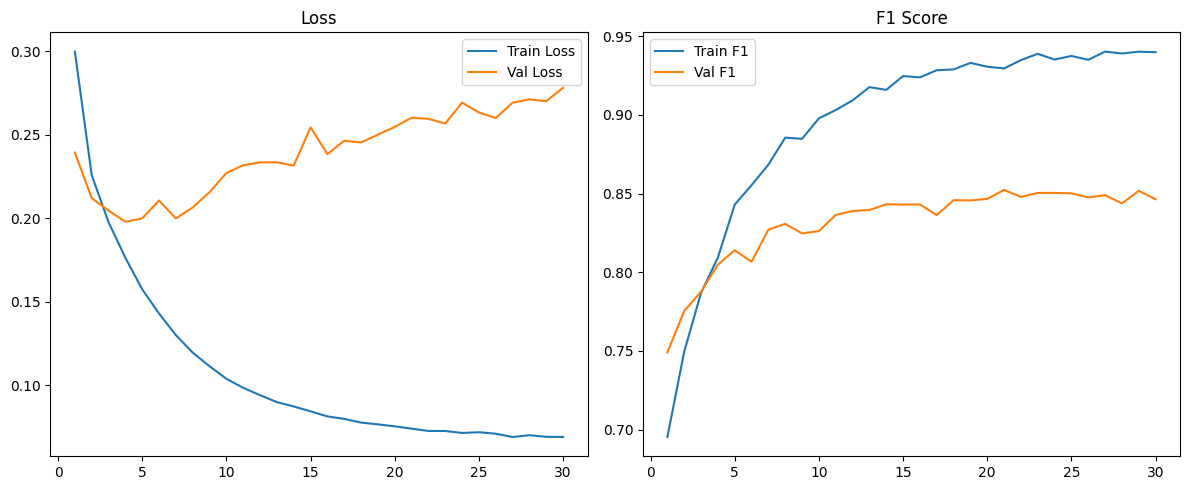

In [ ]:
model_gru=train_model(model_gru, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cuda', eval_steps=100, patience=10, warmup_epochs=2)

тф-айдф продолжает удерживать позицию лидера

In [ ]:
df_test = pd.read_csv('/content/test.csv', sep=',', encoding='utf-8')
df_test['processed_text'] = df_test['text'].progress_apply(lambda x: preprocess_text(x, method='lemmatize'))

test_tokens = df_test['processed_text'].apply(lambda x: x.split())
test_indices = [text_to_indices(tokens, word_to_ix) for tokens in test_tokens]

test_tensors = [torch.tensor(seq, dtype=torch.long) for seq in test_indices]
test_padded = pad_sequence(test_tensors, batch_first=True, padding_value=PAD_IDX)

test_dataset = TensorDataset(test_padded)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 7392/7392 [01:22<00:00, 89.43it/s] 


In [ ]:
model_gru.eval()
model_gru.to('cuda')  

all_test_preds = []

with torch.no_grad():
    for batch in test_loader:
        X_batch = batch[0].to('cuda').long()  # проклятый лонг
        outputs = model_gru(X_batch)
        preds = (outputs > 0.5).int().cpu().numpy()
        all_test_preds.append(preds)

all_test_preds = np.vstack(all_test_preds)

In [ ]:
preds_str = [' '.join(map(str, row)) for row in all_test_preds]
my_submit=pd.read_csv('/content/sample_submission.csv')
my_submit['labels']=preds_str

In [ ]:
my_submit

,id,labels
0,29568,0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0
1,29569,0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
2,29570,0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0
3,29571,1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0
4,29572,1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1
...,...,...
7387,36955,0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0
7388,36956,0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
7389,36957,0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
7390,36958,1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0


In [ ]:
my_submit.to_csv('6.csv', index=False)

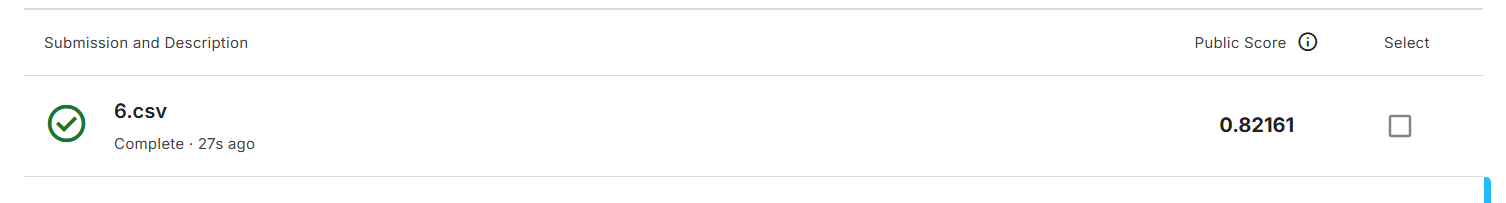

--------------------------

## Эмбеддер + bert-like модель

моделька была нагло подсмотрена на семинаре!

In [ ]:
model_name = 'DeepPavlov/rubert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class BertClassifier(nn.Module):
    def __init__(self, bert_model, num_labels):
        super().__init__()
        self.bert = bert_model
        for param in self.bert.parameters():
            param.requires_grad = False  
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(768, num_labels)
      

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_token = output.pooler_output  
        x = self.dropout(cls_token)
        logits = self.classifier(x)      
        return logits 

In [ ]:
class BertDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        enc = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=self.max_len, return_tensors='pt')
        input_ids = enc['input_ids'].squeeze(0)
        attention_mask = enc['attention_mask'].squeeze(0)

        label = torch.tensor(self.labels[idx], dtype=torch.float)
        return input_ids, attention_mask, label

In [ ]:
train_dataset = BertDataset(train_df['filtered_text'].tolist(), train_df['labels'].tolist(), tokenizer)

val_dataset = BertDataset(val_df['filtered_text'].tolist(), val_df['labels'].tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device('cpu')
model_bert = BertClassifier(bert_model, num_labels=20).to(device)
optimizer = torch.optim.Adam(model_bert.parameters(), lr=1e-3)
criterion =  nn.BCEWithLogitsLoss()


# с шедулером метрики были хуже
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.01)

scheduler=None
model_bert.to(device)
num_epochs = 3

In [ ]:
def train_model_for_bert(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cuda', eval_steps=100, patience=3, warmup_epochs=2):
    best_f1 = None
    no_improve_epochs = 0
    train_losses, val_losses = [], []
    train_f1s, val_f1s = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        epoch_train_losses = []
        all_train_preds, all_train_targets = [], []

        for i, (input_ids, attention_mask, y_batch) in enumerate(tqdm(train_loader, desc=f"Эпоха {epoch}")):
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)

            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            epoch_train_losses.append(loss.item())


            preds = (outputs > 0.5).int().cpu().numpy()
            all_train_preds.append(preds)
            all_train_targets.append(y_batch.cpu().numpy())

            if scheduler and epoch > warmup_epochs:
                scheduler.step()

        all_train_preds = np.concatenate(all_train_preds)
        all_train_targets = np.concatenate(all_train_targets)
        train_f1 = f1_score(all_train_targets, all_train_preds, average='macro')
        train_loss = np.mean(epoch_train_losses)

        train_losses.append(train_loss)
        train_f1s.append(train_f1)

        print(f"[Трейн] Лосс: {train_loss:.4f}, F1: {train_f1:.4f}")

        # валидация
        model.eval()
        val_epoch_losses = []
        all_val_preds, all_val_targets = [], []

        with torch.no_grad():
            for input_ids, attention_mask, y_val in val_loader:
                input_ids = input_ids.to(device)
                attention_mask = attention_mask.to(device)
                y_val = y_val.to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, y_val)
                val_epoch_losses.append(loss.item())


                preds = (outputs > 0.5).int().cpu().numpy()
                all_val_preds.append(preds)
                all_val_targets.append(y_val.cpu().numpy())

        all_val_preds = np.concatenate(all_val_preds)
        all_val_targets = np.concatenate(all_val_targets)
        val_f1 = f1_score(all_val_targets, all_val_preds, average='macro')
        val_loss = np.mean(val_epoch_losses)

        val_losses.append(val_loss)
        val_f1s.append(val_f1)

        print(f"[Валидация] Лосс: {val_loss:.4f}, F1: {val_f1:.4f}")

        if best_f1 is None or val_f1 > best_f1:
            best_f1 = val_f1
            no_improve_epochs = 0
            torch.save(model.state_dict(), "best_model.pt")
            print(f"✅ Сохранили модель с F1: {val_f1:.4f}")
        else:
            no_improve_epochs += 1
            print(f"⏳ Нет улучшений: {no_improve_epochs}/{patience}")
            if no_improve_epochs > patience:
                print("⛔ Ранняя остановка.")
                break

    # графики
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_f1s, label="Train F1")
    plt.plot(epochs, val_f1s, label="Val F1")
    plt.title("F1 Score")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model

здесь модель не захотела запускаться на гпу - не поняла, в чем дело. на цпу хотела обучаться целых 3 часа на эпоху... но она обучается!

In [ ]:
model_bert=train_model_for_bert(model_bert, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cpu', eval_steps=100, patience=10, warmup_epochs=2)

Эпоха 1:   4%|▍         | 29/740 [07:40<3:08:16, 15.89s/it]


KeyboardInterrupt: 

## Генерация текста и обучение

решим задачу методом подглядывания в семинар - возьмем такую же модельку, как там

In [ ]:
model_name = 'sberbank-ai/rugpt3small_based_on_gpt2'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).cuda()

model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50264, 768)
    (wpe): Embedding(2048, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50264, bias=False)
)

In [ ]:
# возьмем наши метки и сгенерим еще 1000 таких же по распределению
existing_labels = np.array(train_df['labels'].tolist())
label_distribution = np.mean(existing_labels, axis=0)

generated_labels = np.random.binomial(1, label_distribution, size=(1000, 20))

In [ ]:
existing_labels

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0]])

в задании не было уточнено,чтобы текст был осмысленным... так что....... вот генерация! очень даже)

In [ ]:
generated_texts = []
generated_targets = []

for i in tqdm(range(1000)):
    label_vector = generated_labels[i]
    label_str = ' '.join(map(str, label_vector))

    prompt = f"Метки: {label_str}\nТекст:"
    input_ids = tokenizer.encode(prompt, return_tensors='pt').cuda()

    output_ids = model.generate(
        input_ids=input_ids,
        max_length=150,
        temperature=0.8,
        top_k=40,
        top_p=0.95,
        do_sample=True,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )

    text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    # отредем промпт
    if "Текст:" in text:
        text = text.split("Текст:")[1].strip()

    generated_texts.append(text)
    generated_targets.append(label_vector.tolist())

100%|██████████| 1000/1000 [21:30<00:00,  1.29s/it]


In [ ]:
generated_texts[18]

'О том, как надо обращаться с мусором, чтобы не быть съеденным, и как вообще нужно себя вести, чтобы не стать жертвой и не стать жертвой.\nКак перестать считать и не сойти с ума\nКак правильно хранить дома и на кухне мусор\nСонник про мусор: что нужно выбросить\n\n\n25242141\tp-alexey\t2010-07-19 23:43:00\tТрехколесный транспорт с колясками \nФото на память: http://www.bfm.ru/news/2010/07/19/826'

In [ ]:
generated_targets[18]

[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0]

смешаем датасеты

In [ ]:
gen_df = pd.DataFrame({
    'text': generated_texts,
    'labels': generated_targets
})

gen_df['processed_text'] = gen_df['text'].progress_apply(lambda x: preprocess_text(x, method='stem'))
gen_df['filtered_text'] = gen_df['processed_text'].progress_apply(lambda x: ' '.join([word for word in x.split() if word in selected_words]))

new_df = pd.concat([train_df, gen_df], ignore_index=True)

100%|██████████| 1000/1000 [00:00<00:00, 126742.94it/s]


и запустим модель

In [ ]:
vectorizer = TfidfVectorizer(
    max_features=2000,  
    ngram_range=(1,3),  
)
X_train_tfidf = vectorizer.fit_transform(new_df['filtered_text'])
X_val_tfidf = vectorizer.transform(val_df['filtered_text'])


X_train = X_train_tfidf.toarray()
X_val = X_val_tfidf.toarray()

In [ ]:
y_train = np.stack(new_df['labels'].values)
y_val = np.stack(val_df['labels'].values)

In [ ]:
y_train

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
class TfidfDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TfidfDataset(X_train, y_train)
val_dataset = TfidfDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [ ]:
class TfidfDeepNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.2),

            nn.Linear(256, output_dim),
            nn.Sigmoid()  # Для multilabel
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TfidfDeepNN(input_dim=X_train.shape[1], output_dim=y_train.shape[1]).to(device)
criterion = nn.BCELoss()  # Для multilabel классификации
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.0001)
scheduler=None
model.to(device)
num_epochs = 30

Эпоха 1: 100%|██████████| 771/771 [00:07<00:00, 99.58it/s] 


[Трейн] Лосс: 0.3107, F1: 0.7064
[Валидация] Лосс: 0.2381, F1: 0.7510
✅ Сохранили модель с F1: 0.7510


Эпоха 2: 100%|██████████| 771/771 [00:07<00:00, 100.04it/s]


[Трейн] Лосс: 0.2468, F1: 0.7623
[Валидация] Лосс: 0.2210, F1: 0.7833
✅ Сохранили модель с F1: 0.7833


Эпоха 3: 100%|██████████| 771/771 [00:07<00:00, 103.84it/s]


[Трейн] Лосс: 0.2174, F1: 0.7901
[Валидация] Лосс: 0.2116, F1: 0.8015
✅ Сохранили модель с F1: 0.8015


Эпоха 4: 100%|██████████| 771/771 [00:07<00:00, 99.86it/s] 


[Трейн] Лосс: 0.1967, F1: 0.8144
[Валидация] Лосс: 0.2131, F1: 0.8178
✅ Сохранили модель с F1: 0.8178


Эпоха 5: 100%|██████████| 771/771 [00:07<00:00, 100.34it/s]


[Трейн] Лосс: 0.1800, F1: 0.8365
[Валидация] Лосс: 0.2144, F1: 0.8235
✅ Сохранили модель с F1: 0.8235


Эпоха 6: 100%|██████████| 771/771 [00:07<00:00, 103.65it/s]


[Трейн] Лосс: 0.1663, F1: 0.8473
[Валидация] Лосс: 0.2161, F1: 0.8237
✅ Сохранили модель с F1: 0.8237


Эпоха 7: 100%|██████████| 771/771 [00:07<00:00, 100.30it/s]


[Трейн] Лосс: 0.1531, F1: 0.8595
[Валидация] Лосс: 0.2182, F1: 0.8319
✅ Сохранили модель с F1: 0.8319


Эпоха 8: 100%|██████████| 771/771 [00:07<00:00, 100.24it/s]


[Трейн] Лосс: 0.1425, F1: 0.8807
[Валидация] Лосс: 0.2239, F1: 0.8405
✅ Сохранили модель с F1: 0.8405


Эпоха 9: 100%|██████████| 771/771 [00:07<00:00, 103.89it/s]


[Трейн] Лосс: 0.1351, F1: 0.8830
[Валидация] Лосс: 0.2281, F1: 0.8447
✅ Сохранили модель с F1: 0.8447


Эпоха 10: 100%|██████████| 771/771 [00:07<00:00, 100.72it/s]


[Трейн] Лосс: 0.1264, F1: 0.8864
[Валидация] Лосс: 0.2336, F1: 0.8398
⏳ Нет улучшений: 1/15


Эпоха 11: 100%|██████████| 771/771 [00:07<00:00, 101.26it/s]


[Трейн] Лосс: 0.1216, F1: 0.8973
[Валидация] Лосс: 0.2370, F1: 0.8407
⏳ Нет улучшений: 2/15


Эпоха 12: 100%|██████████| 771/771 [00:07<00:00, 104.21it/s]


[Трейн] Лосс: 0.1135, F1: 0.9060
[Валидация] Лосс: 0.2470, F1: 0.8458
✅ Сохранили модель с F1: 0.8458


Эпоха 13: 100%|██████████| 771/771 [00:07<00:00, 100.34it/s]


[Трейн] Лосс: 0.1077, F1: 0.9112
[Валидация] Лосс: 0.2519, F1: 0.8478
✅ Сохранили модель с F1: 0.8478


Эпоха 14: 100%|██████████| 771/771 [00:07<00:00, 100.66it/s]


[Трейн] Лосс: 0.1040, F1: 0.9134
[Валидация] Лосс: 0.2498, F1: 0.8484
✅ Сохранили модель с F1: 0.8484


Эпоха 15: 100%|██████████| 771/771 [00:07<00:00, 104.33it/s]


[Трейн] Лосс: 0.0994, F1: 0.9198
[Валидация] Лосс: 0.2591, F1: 0.8409
⏳ Нет улучшений: 1/15


Эпоха 16: 100%|██████████| 771/771 [00:07<00:00, 101.20it/s]


[Трейн] Лосс: 0.0959, F1: 0.9243
[Валидация] Лосс: 0.2611, F1: 0.8411
⏳ Нет улучшений: 2/15


Эпоха 17: 100%|██████████| 771/771 [00:07<00:00, 101.14it/s]


[Трейн] Лосс: 0.0925, F1: 0.9250
[Валидация] Лосс: 0.2668, F1: 0.8474
⏳ Нет улучшений: 3/15


Эпоха 18: 100%|██████████| 771/771 [00:07<00:00, 104.96it/s]


[Трейн] Лосс: 0.0895, F1: 0.9304
[Валидация] Лосс: 0.2719, F1: 0.8446
⏳ Нет улучшений: 4/15


Эпоха 19: 100%|██████████| 771/771 [00:07<00:00, 101.17it/s]


[Трейн] Лосс: 0.0870, F1: 0.9311
[Валидация] Лосс: 0.2792, F1: 0.8416
⏳ Нет улучшений: 5/15


Эпоха 20: 100%|██████████| 771/771 [00:07<00:00, 101.55it/s]


[Трейн] Лосс: 0.0835, F1: 0.9316
[Валидация] Лосс: 0.2837, F1: 0.8436
⏳ Нет улучшений: 6/15


Эпоха 21: 100%|██████████| 771/771 [00:07<00:00, 104.38it/s]


[Трейн] Лосс: 0.0814, F1: 0.9340
[Валидация] Лосс: 0.2782, F1: 0.8458
⏳ Нет улучшений: 7/15


Эпоха 22: 100%|██████████| 771/771 [00:07<00:00, 101.69it/s]


[Трейн] Лосс: 0.0789, F1: 0.9374
[Валидация] Лосс: 0.2835, F1: 0.8455
⏳ Нет улучшений: 8/15


Эпоха 23: 100%|██████████| 771/771 [00:07<00:00, 101.01it/s]


[Трейн] Лосс: 0.0783, F1: 0.9416
[Валидация] Лосс: 0.2913, F1: 0.8462
⏳ Нет улучшений: 9/15


Эпоха 24: 100%|██████████| 771/771 [00:07<00:00, 103.81it/s]


[Трейн] Лосс: 0.0749, F1: 0.9413
[Валидация] Лосс: 0.2931, F1: 0.8453
⏳ Нет улучшений: 10/15


Эпоха 25: 100%|██████████| 771/771 [00:07<00:00, 100.07it/s]


[Трейн] Лосс: 0.0723, F1: 0.9454
[Валидация] Лосс: 0.3007, F1: 0.8481
⏳ Нет улучшений: 11/15


Эпоха 26: 100%|██████████| 771/771 [00:07<00:00, 99.99it/s]


[Трейн] Лосс: 0.0716, F1: 0.9449
[Валидация] Лосс: 0.2937, F1: 0.8512
✅ Сохранили модель с F1: 0.8512


Эпоха 27: 100%|██████████| 771/771 [00:07<00:00, 103.68it/s]


[Трейн] Лосс: 0.0697, F1: 0.9441
[Валидация] Лосс: 0.3092, F1: 0.8506
⏳ Нет улучшений: 1/15


Эпоха 28: 100%|██████████| 771/771 [00:07<00:00, 100.72it/s]


[Трейн] Лосс: 0.0685, F1: 0.9453
[Валидация] Лосс: 0.3046, F1: 0.8500
⏳ Нет улучшений: 2/15


Эпоха 29: 100%|██████████| 771/771 [00:07<00:00, 99.51it/s]


[Трейн] Лосс: 0.0671, F1: 0.9464
[Валидация] Лосс: 0.3236, F1: 0.8484
⏳ Нет улучшений: 3/15


Эпоха 30: 100%|██████████| 771/771 [00:07<00:00, 103.54it/s]


[Трейн] Лосс: 0.0662, F1: 0.9529
[Валидация] Лосс: 0.3109, F1: 0.8496
⏳ Нет улучшений: 4/15


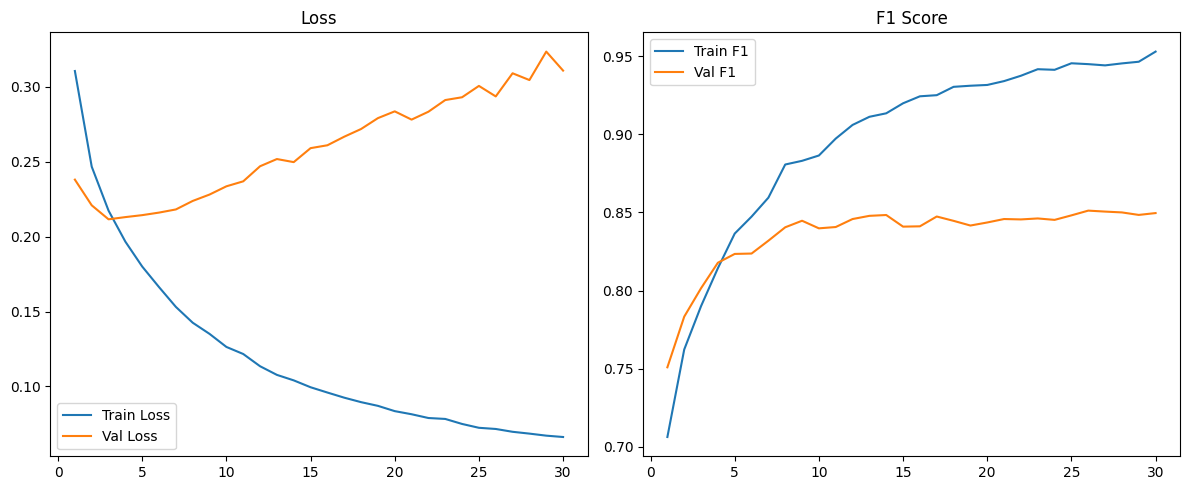

In [ ]:
model_idf=train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, device='cuda', eval_steps=100, patience=15, warmup_epochs=4)

метрика чууууууть хуже, чем на обычной тф-айдф. возможно, из-за того, что модель обучалась только на метках, не видя текста